### Import Data

In [1]:
# load all data
fat = read.table("Fat_Supply_Quantity_Data.csv", header = TRUE, sep = ",")
kcal = read.table("Food_Supply_kcal_Data.csv", header = TRUE, sep = ",")
food = read.table("Food_Supply_Quantity_kg_Data.csv", header = TRUE, sep = ",")
protein = read.table("Protein_Supply_Quantity_Data.csv", header = TRUE, sep = ",")

### Renaming Variables

In [2]:
# renaming variables
dfAsString = function(x){
    deparse(substitute(x))
}
colRename = function(x, name) {
    names(x) = c("Country", "Alc", "AnimalProd", "AnimalFats",
                "AqProd", "Cereal", "Eggs", "Seafood", "Fruits",
                "Meat", "Misc", "Milk", "Offals", "Oilcrops",
                "Pulses", "Spices", "StRt", "Stim", "SugarCrops",
                "Sweeteners", "Treenuts", "VegProd", "VegOil", "Veg", 
                 "Obesity", "Undernourished", "Cfm", "Deaths", "Rec", 
                 "Active", "Pop", "Unit")
    names(x)[2:24] = paste(names(x)[2:24], name, sep = "-")
    return(x)
}
fat = colRename(fat, dfAsString(fat))
kcal = colRename(kcal, dfAsString(kcal))
food = colRename(food, dfAsString(food))
protein = colRename(protein, dfAsString(protein))

## Dealing with X Variables

### Searching for correlation of among diet

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



     fat     kcal     food  protein 
1.371306 2.601704 2.817015 2.870017 


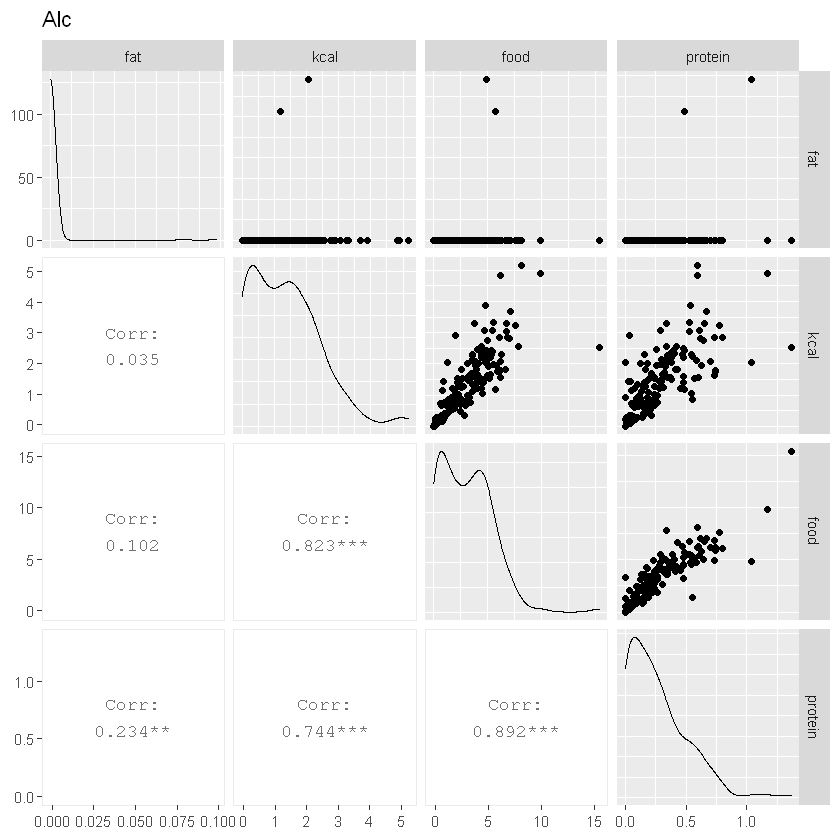

     fat     kcal     food  protein 
3.200043 3.450489 2.687323 3.217413 


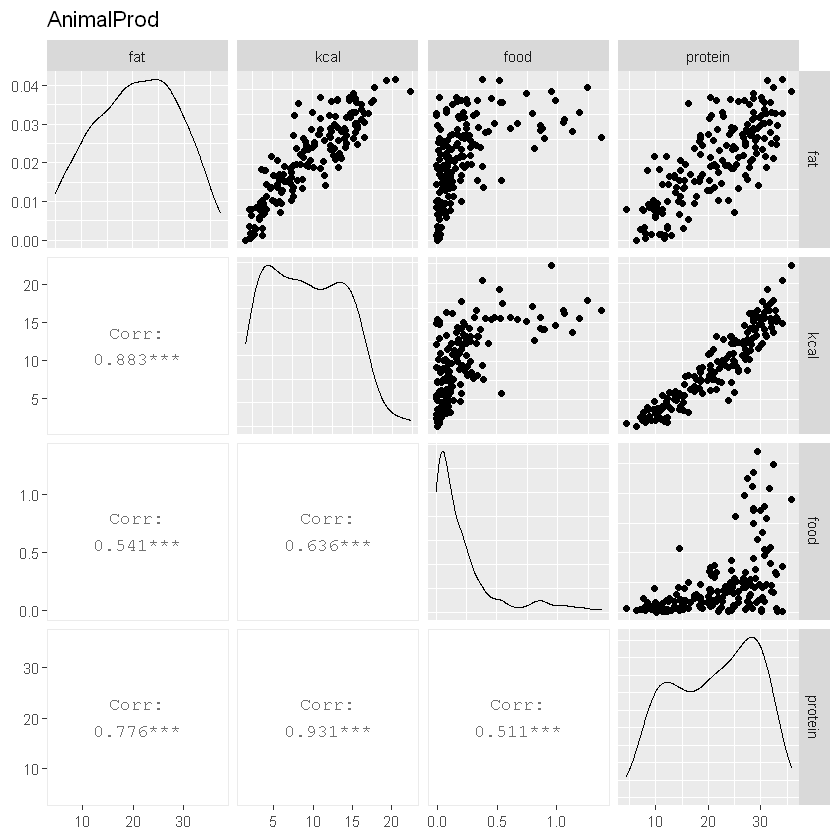

     fat     kcal     food  protein 
3.357310 3.477451 2.802194 3.101854 


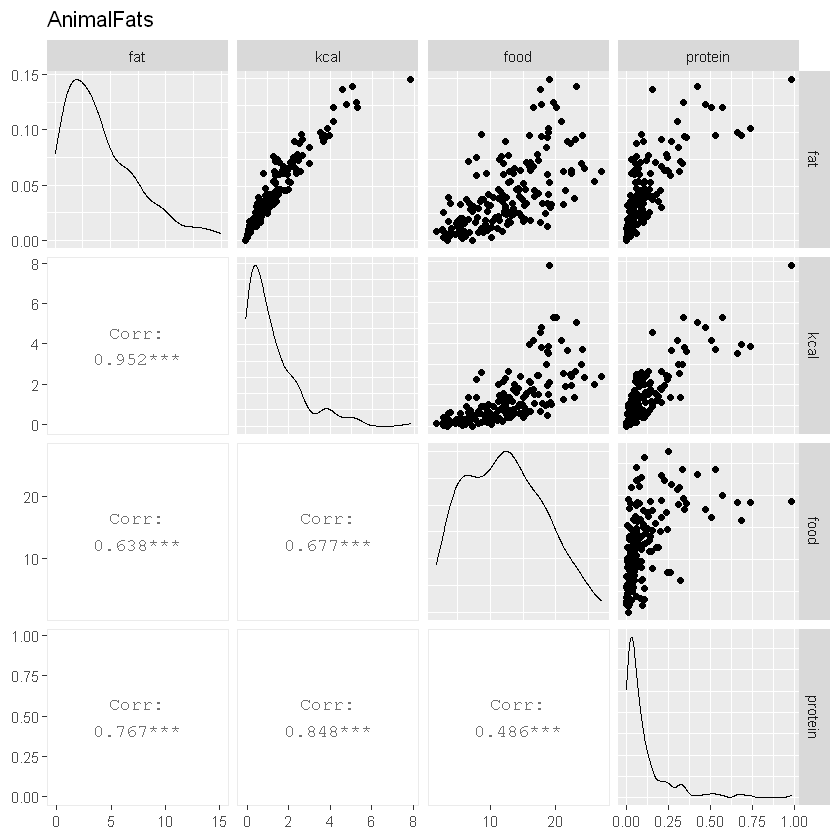

     fat     kcal     food  protein 
3.939839 3.976948 3.973437 3.975504 


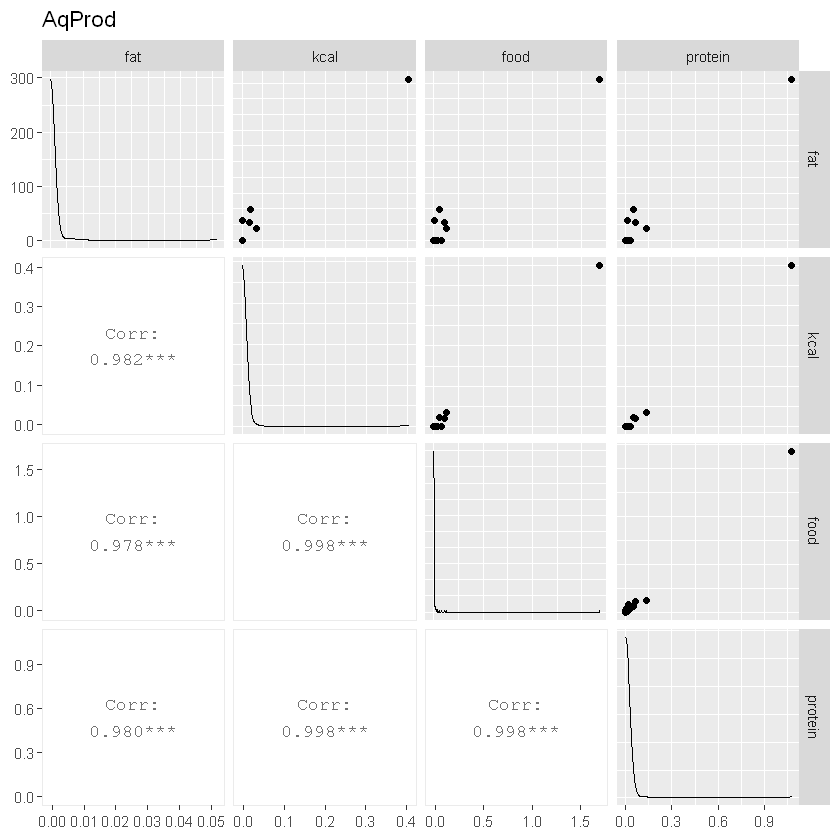

     fat     kcal     food  protein 
3.076555 3.594070 3.460075 3.504274 


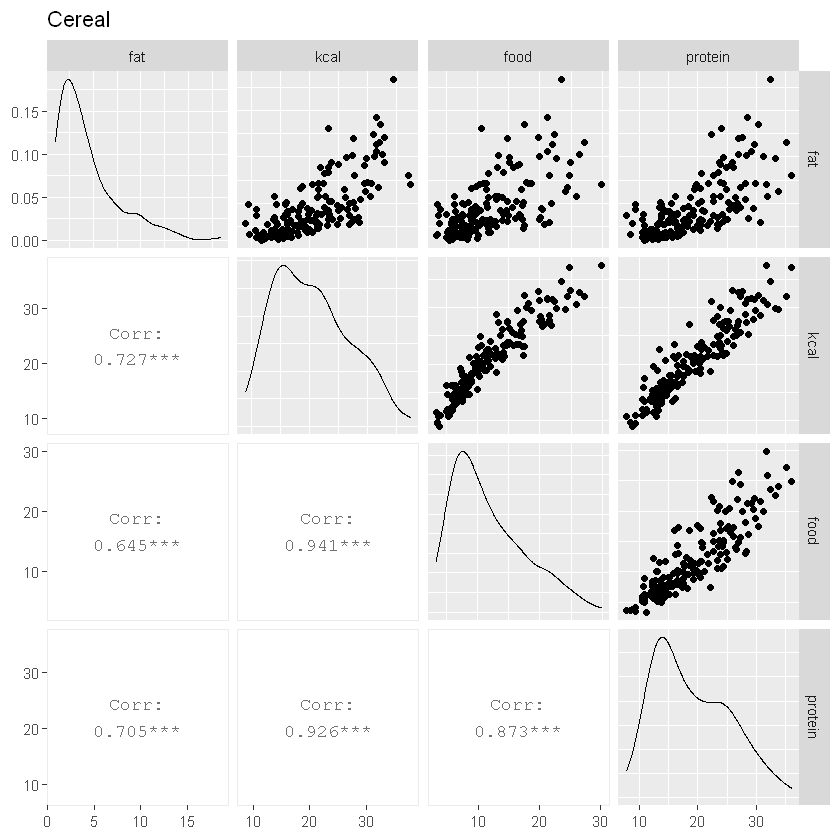

     fat     kcal     food  protein 
3.713467 3.832901 3.818341 3.834960 


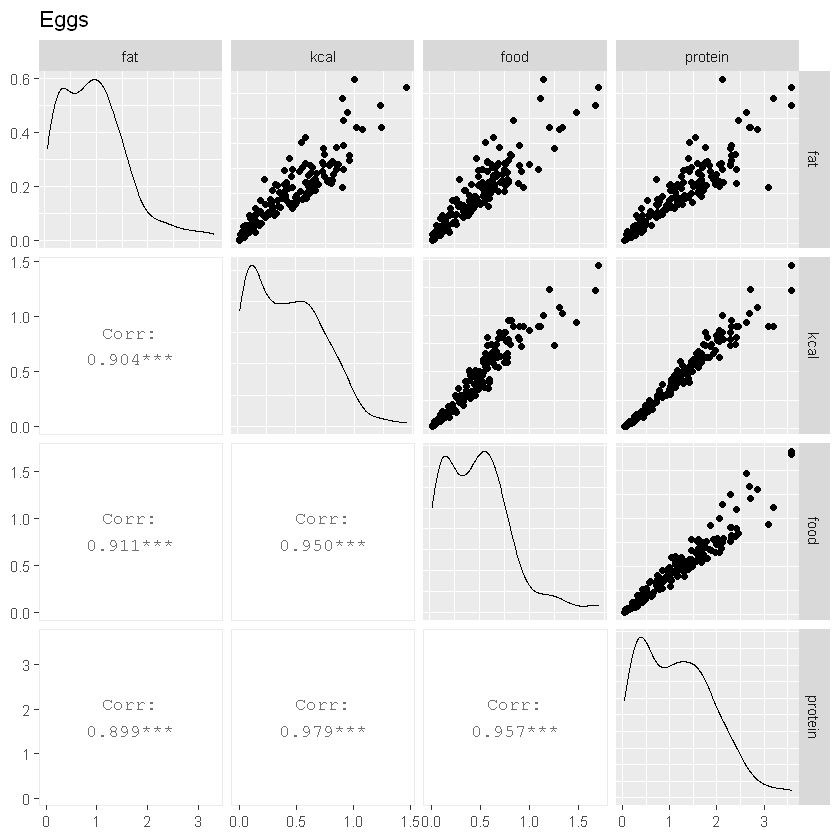

     fat     kcal     food  protein 
3.640761 3.815226 3.770513 3.803397 


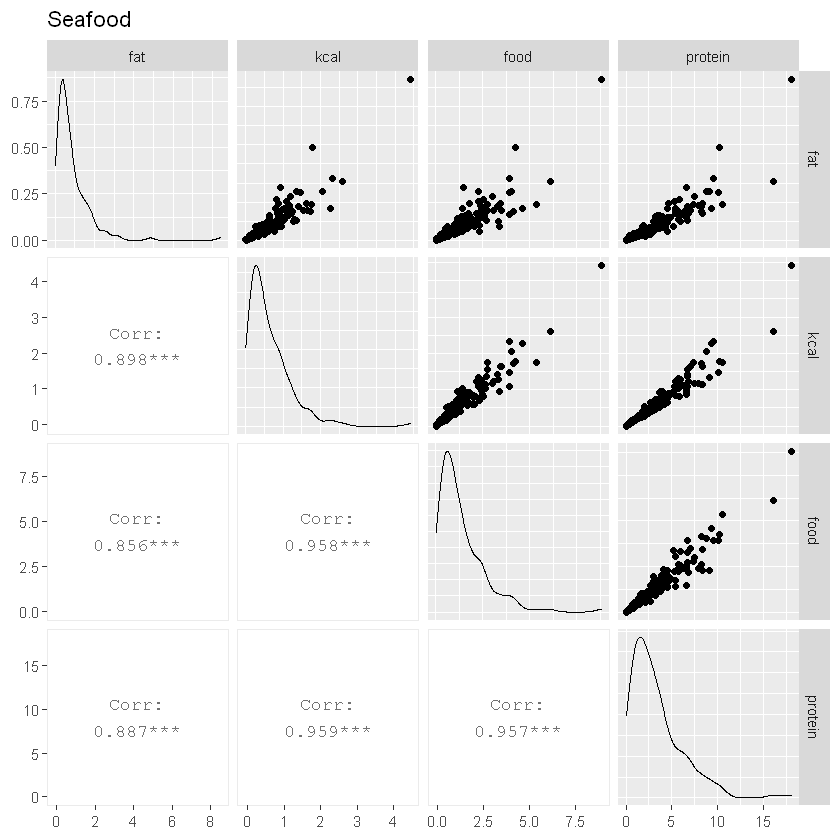

     fat     kcal     food  protein 
2.766618 3.458577 3.318027 3.456033 


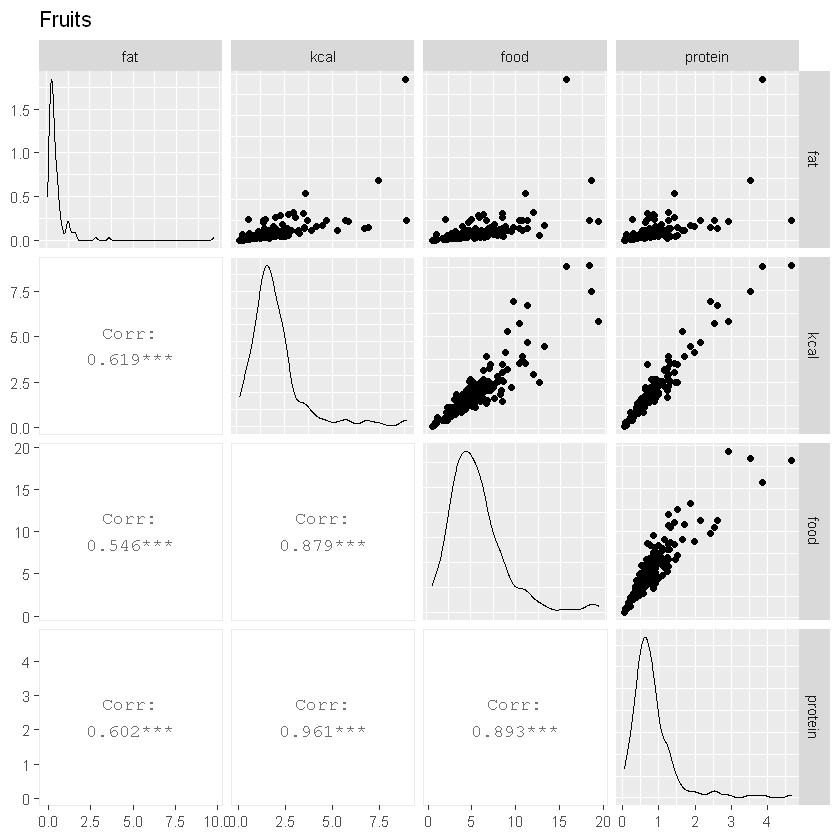

     fat     kcal     food  protein 
3.227571 3.636147 3.510069 3.550453 


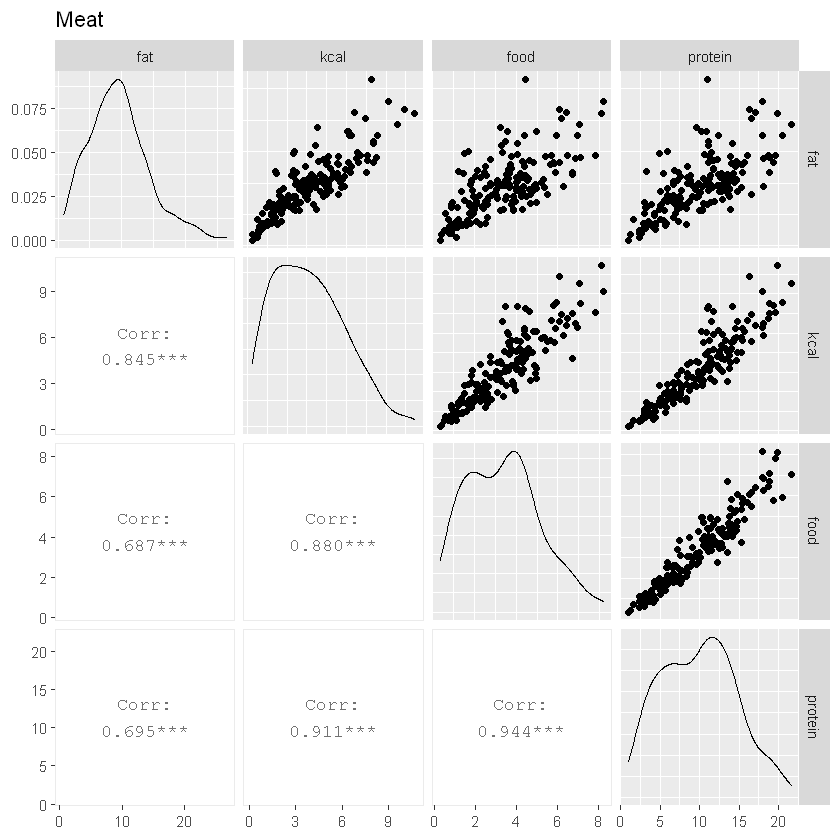

      fat      kcal      food   protein 
0.8637607 2.9155718 2.6394963 2.8695991 


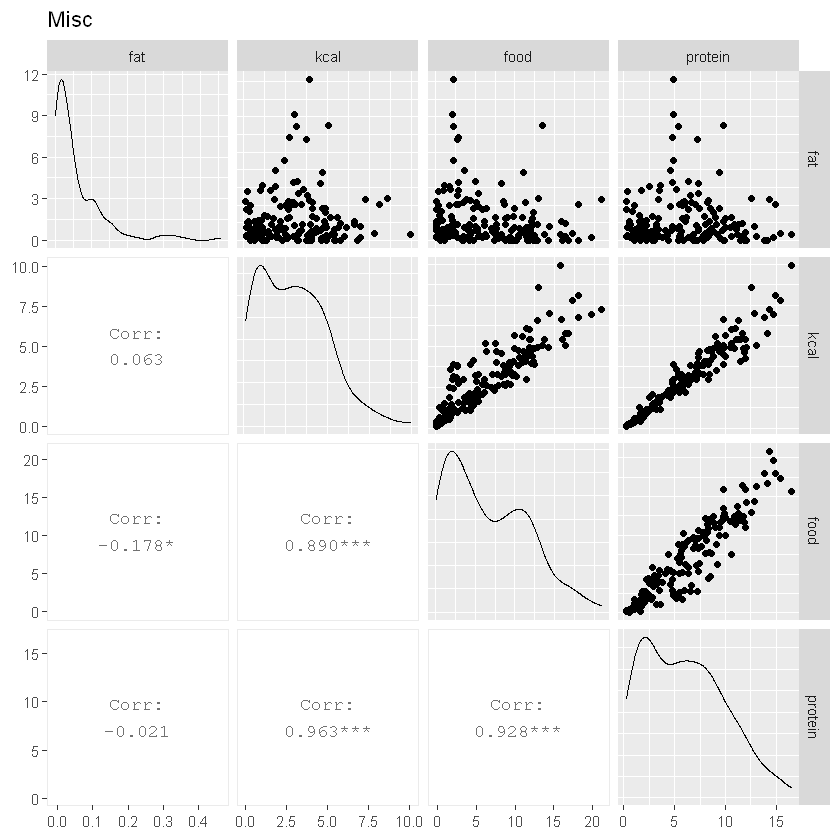

     fat     kcal     food  protein 
1.114919 2.037575 1.971135 1.013472 


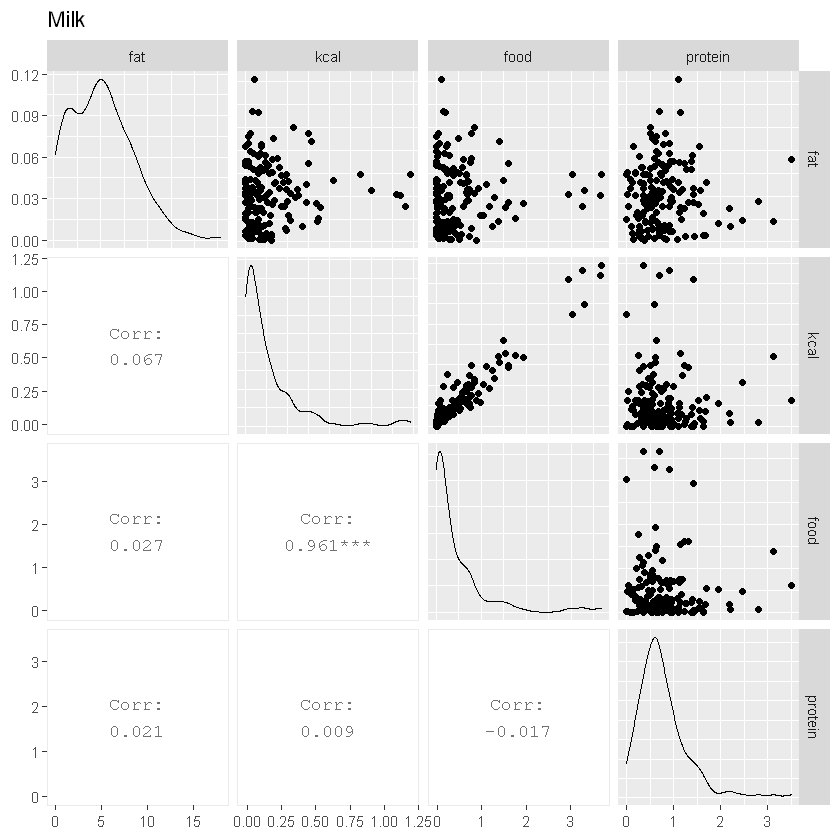

     fat     kcal     food  protein 
2.799031 2.780740 2.918960 1.150221 


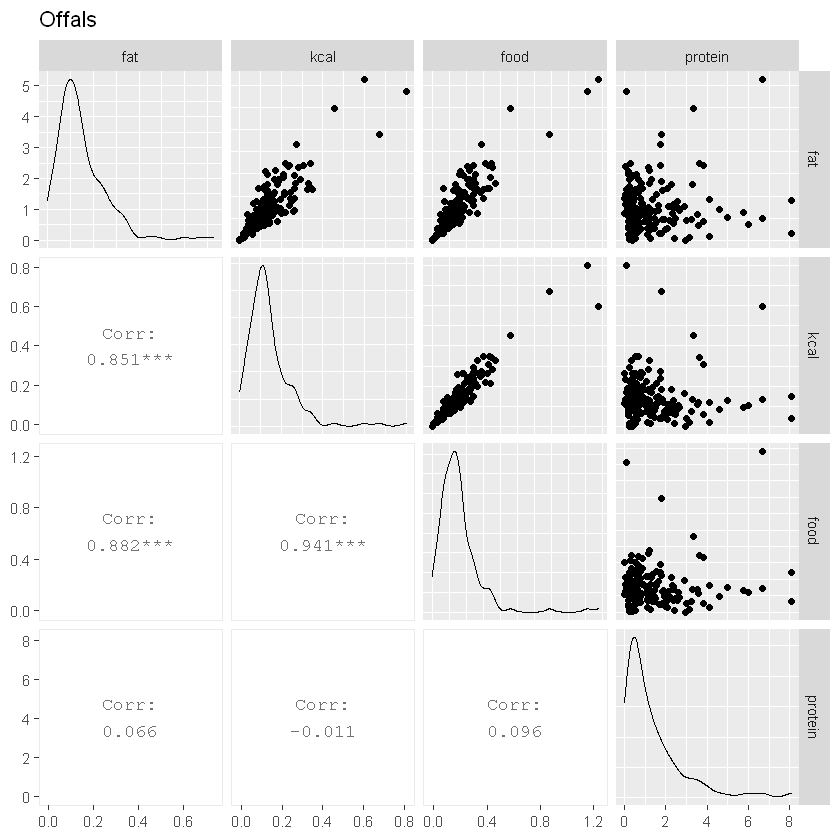

     fat     kcal     food  protein 
2.979891 2.932009 2.789526 1.193051 


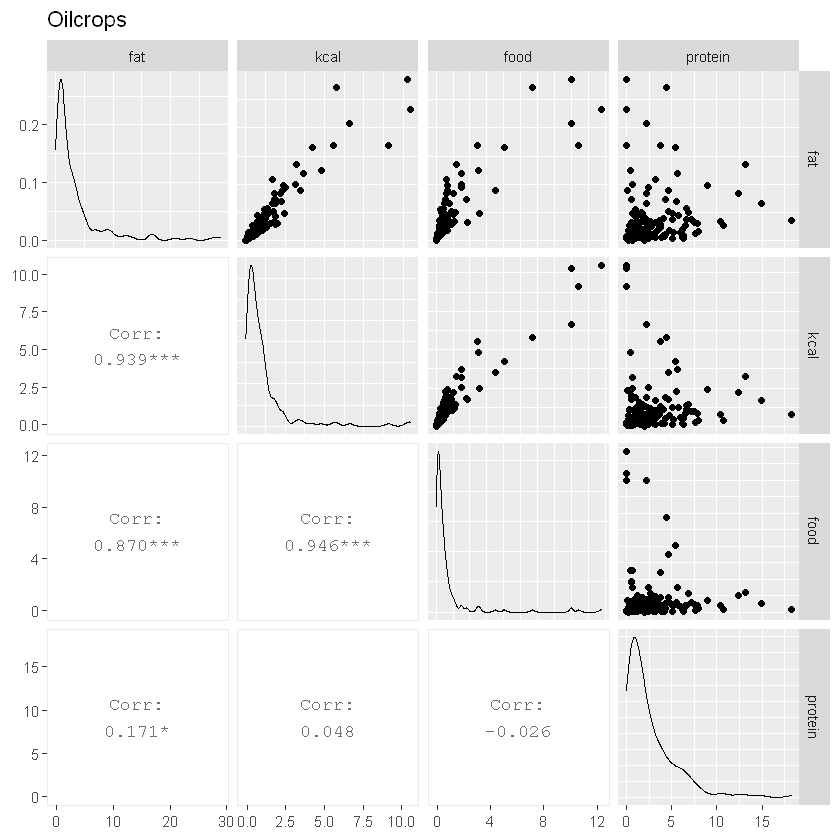

     fat     kcal     food  protein 
2.958076 2.947073 2.937585 1.293149 


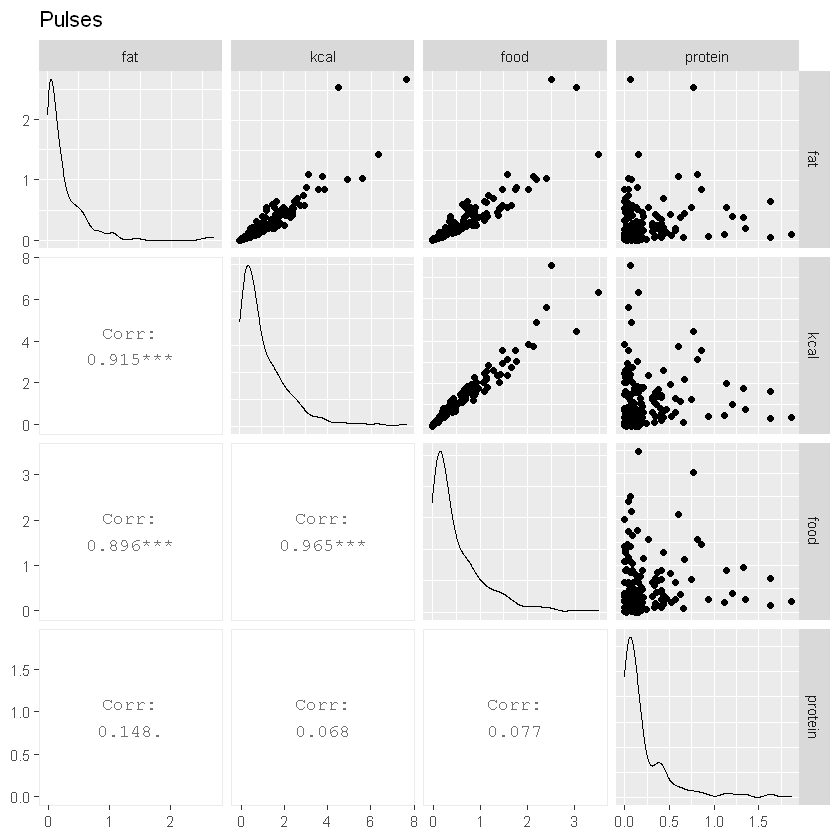

     fat     kcal     food  protein 
2.851348 2.859628 2.798533 1.111294 


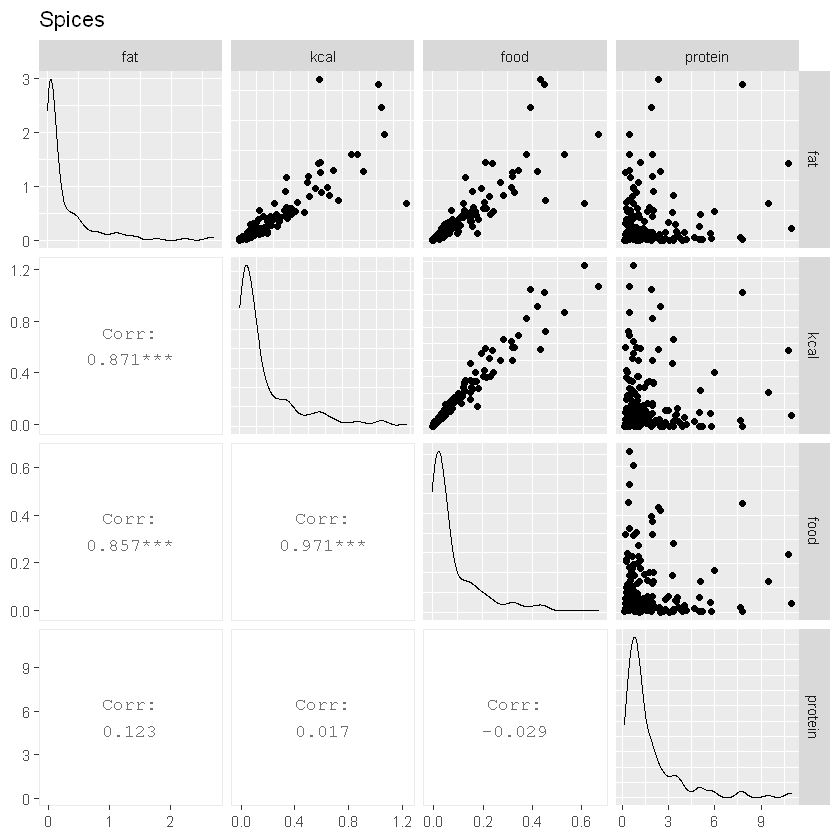

      fat      kcal      food   protein 
2.6456031 2.7450359 2.7110346 0.5002602 


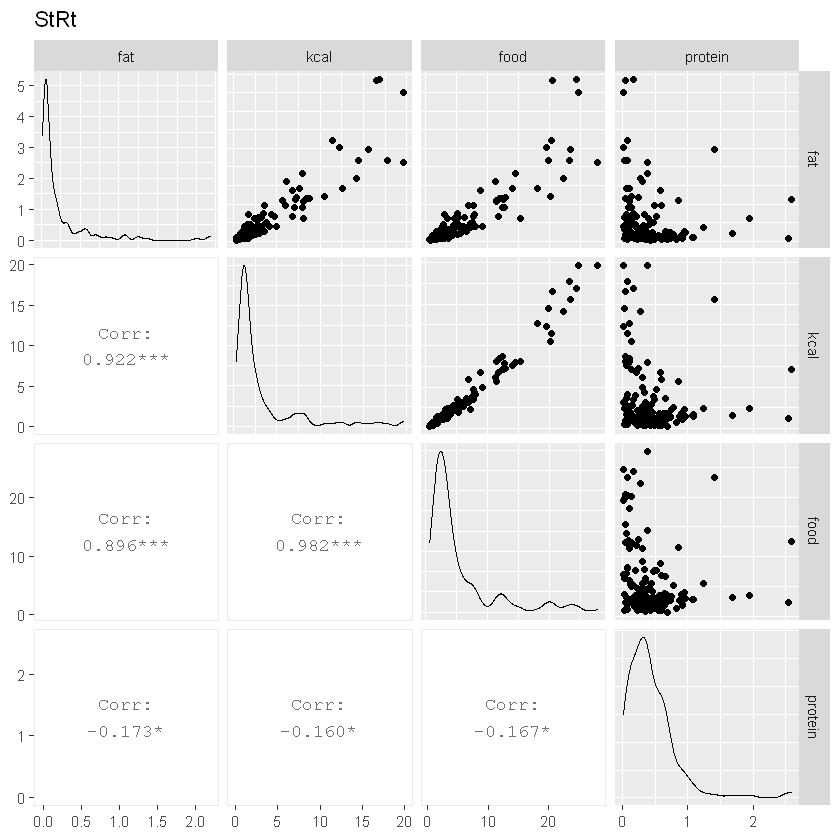

      fat      kcal      food   protein 
2.0381321 2.2777523 1.7290985 0.7764872 


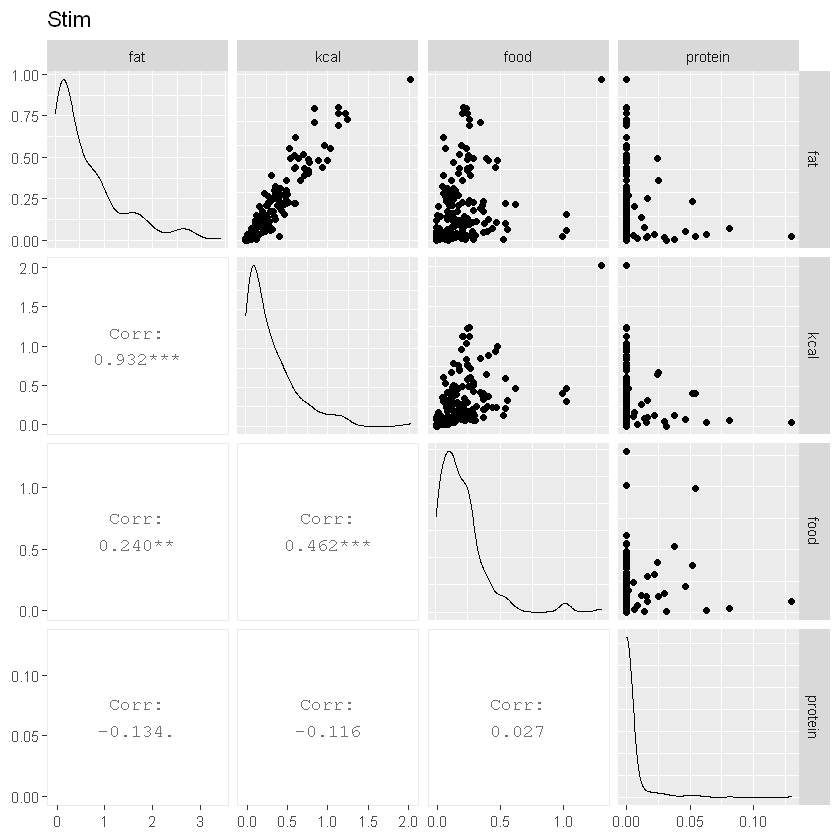

      fat      kcal      food   protein 
1.7487210 1.7471930 0.7409285 1.0556136 


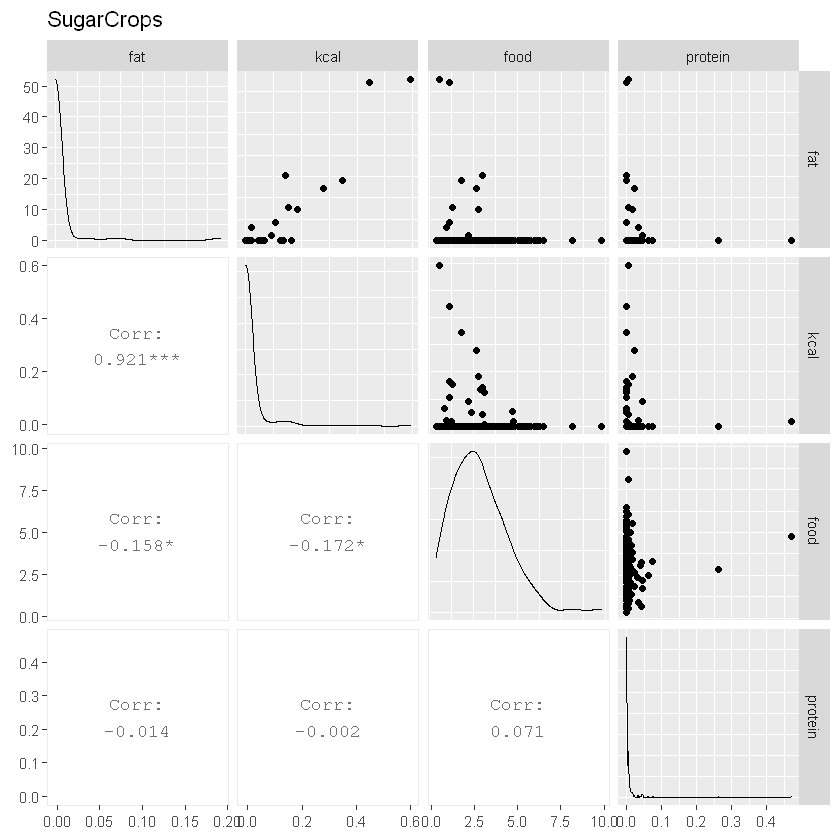

      fat      kcal      food   protein 
0.8943335 0.7769571 0.6731942 0.8800514 


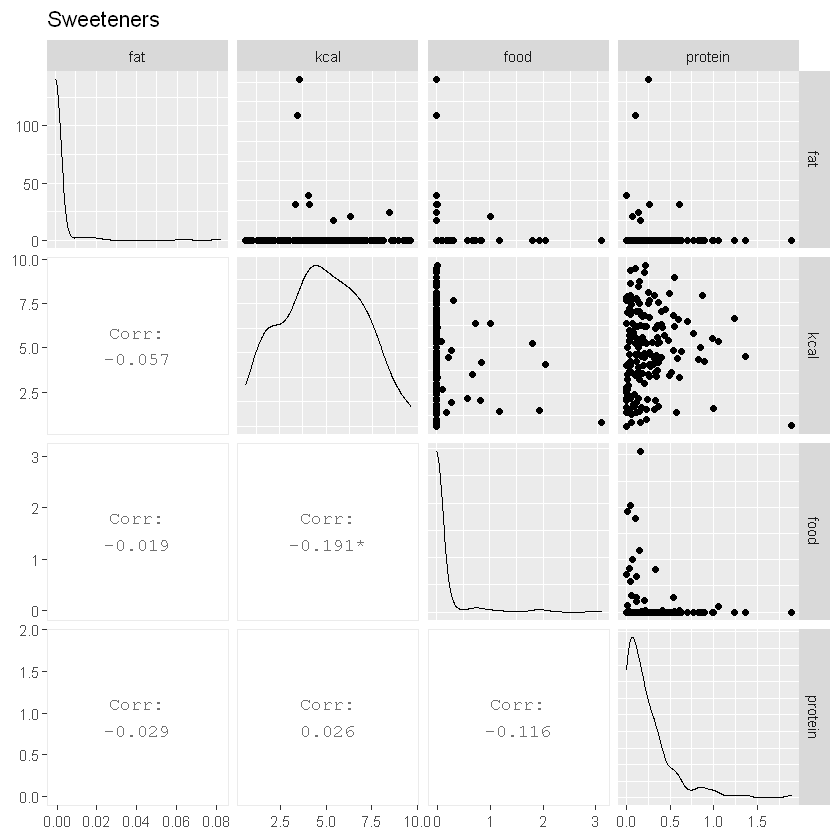

     fat     kcal     food  protein 
2.643001 2.564643 2.666509 0.552237 


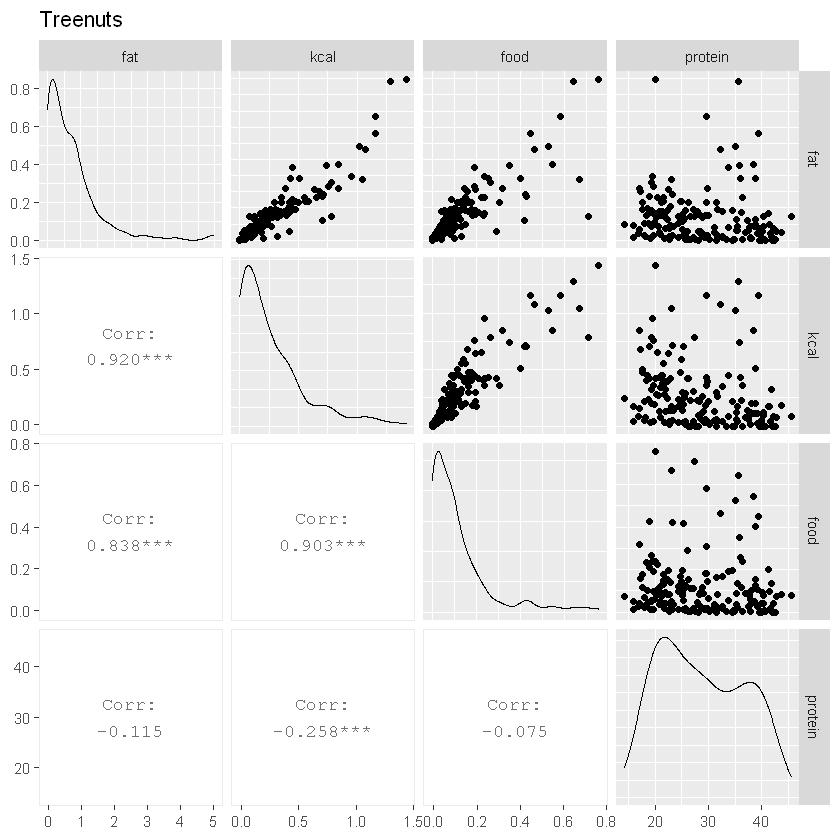

      fat      kcal      food   protein 
1.9502255 1.5577645 1.6078083 0.1908237 


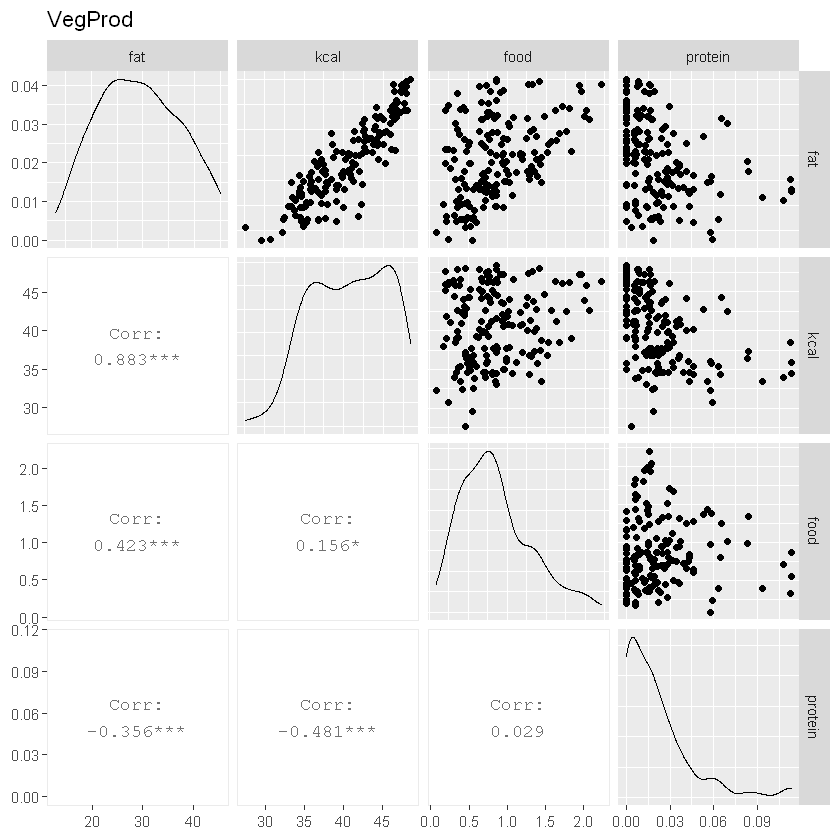

     fat     kcal     food  protein 
1.701673 1.818767 1.883321 1.969532 


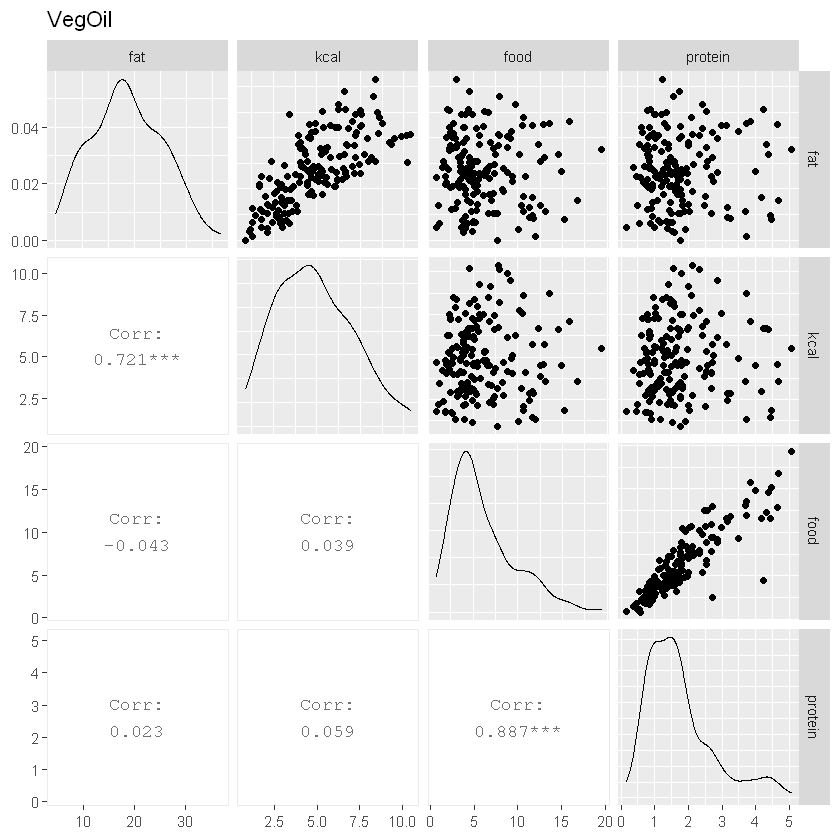

      fat      kcal      food   protein 
1.8717845 1.6178074 0.8910873 0.7357260 


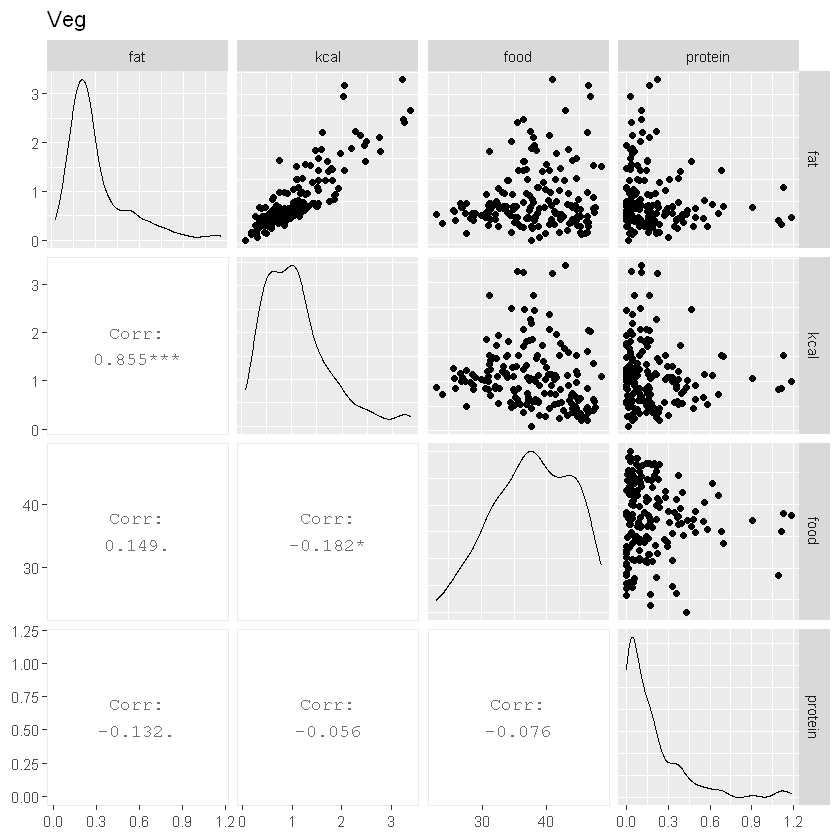

In [3]:
library(GGally)
for (i in 2:24){
    tempDf = as.data.frame(cbind(fat = fat[,i], kcal = kcal[,i], food = food[,i], protein = protein[,i]))
    title = strsplit(names(fat)[i], "-")[[1]]
    print(ggpairs(tempDf, title = title,
        upper = list(continuous = "points"), lower = list(continuous = "cor"), 
        progress = FALSE))
    print(colSums(cor(tempDf)))
}

##### TODO: Consider combining highly correlated X variables by taking means
#### Selected variables:
2. Alc: fat, (kcal, food, protein) <br>
3. Animal Product: mean(fat, kcal, protein), food <br>
4. Animal Fats: mean(fat, kcal), food, protein <br>
5. AqProd: mean(fat, kcal, food, protein) <br>
6. Cereal: fat, kcal <br>
7. Eggs: kcal <br>
8. Seafood: kcal <br>
9. Fruits: fat, protein <br>
10. Meat: kcal <br>
11. Misc: fat, protein <br>
12. Milk: fat, kcal, protein <br>
13. Offals: food, protein <br>
14. Oilcrops: kcal, protein <br>
15. Pulses: kcal, protein <br>
16. Spices: kcal, protein <br>
17. StRt: kcal, protein <br>
18. Stim: fat, food, protein <br>
19. SugarCrops: fat, food, protein <br>
20. Sweeteners: fat, kcal, food, protein <br>
21. Treenuts: kcal, protein <br>
22. VegProd: kcal, food, protein <br>
23. VegOil: fat, kcal, protein <br>
24. Veg: kcal, food, protein <br>
Reduced from 92 to 51 variables related to food 

In project report, show specifically the graphs for Seafood (all highly correlated), Cereal (some highly correlated, some not), and Sweeteners (almost totally uncorrelated).

In [4]:
redDf = cbind(fat[c(1,2,4,6,9,11,12,18,19,20,23)],
             kcal[c(3,5,6,7,8,10,12,14:17,20:24)],
             food[c(2:4,13,18,19,20,22,24)],
             protein[c(4,9,11:31)])
dim(redDf)

[1] 170  59

### Remove X variables with unproper distribution

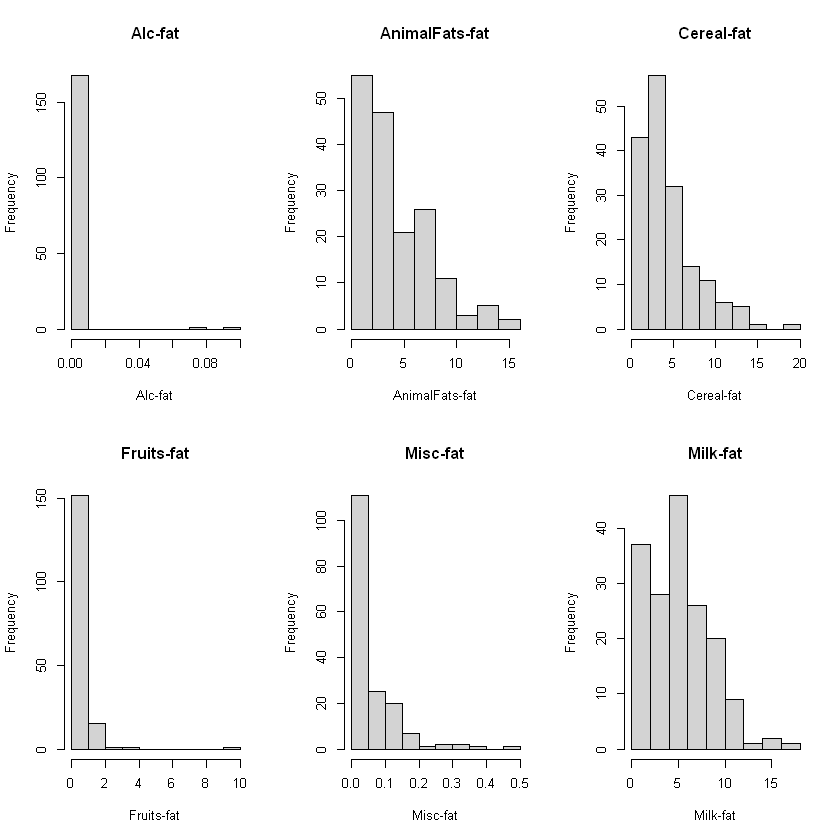

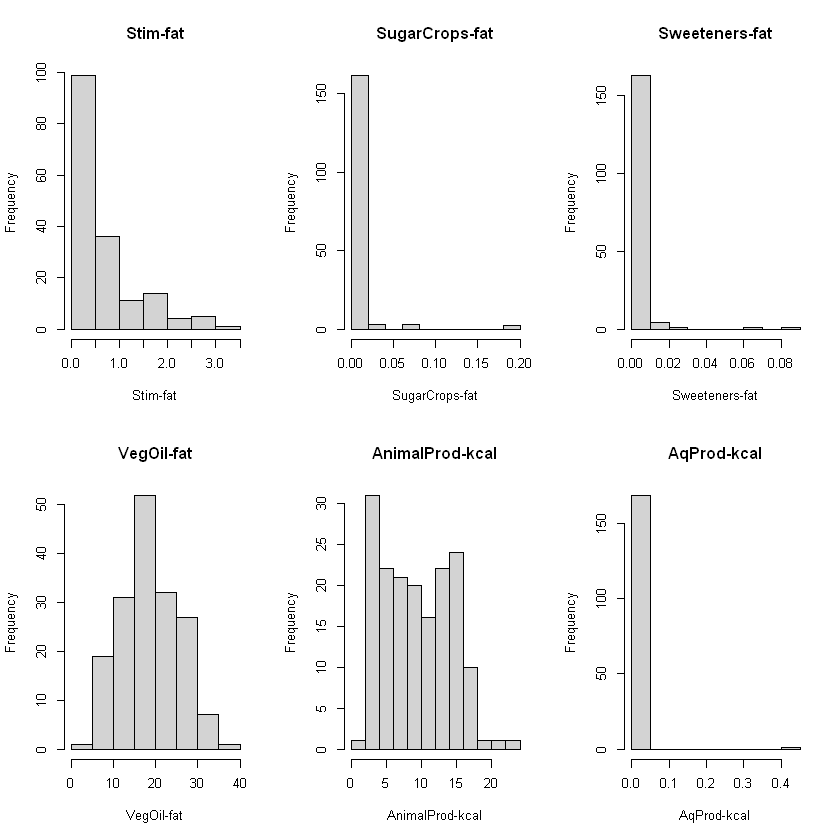

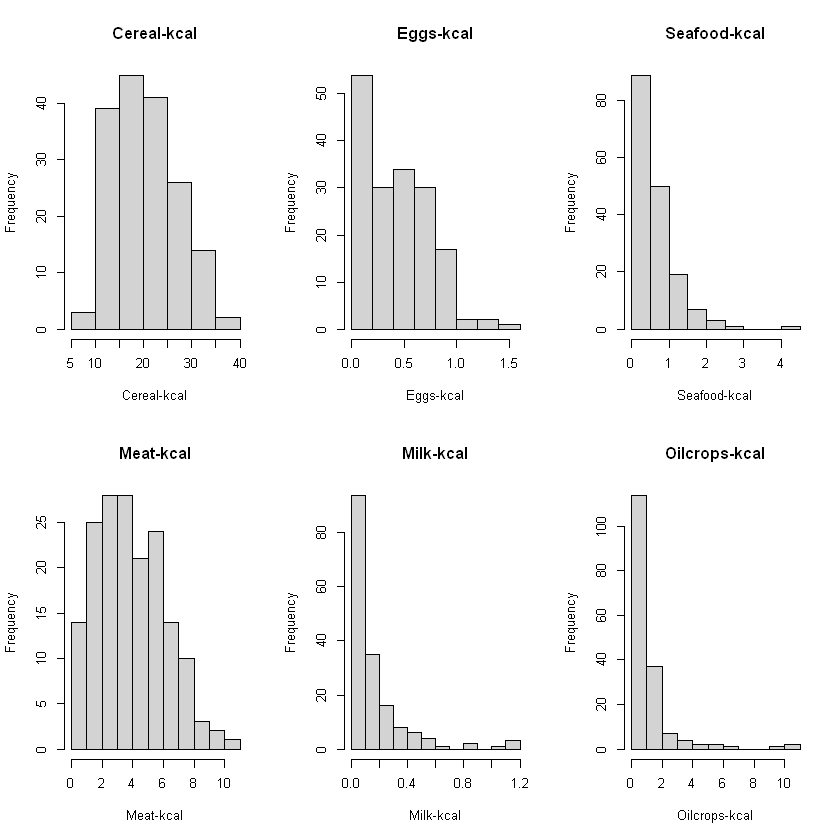

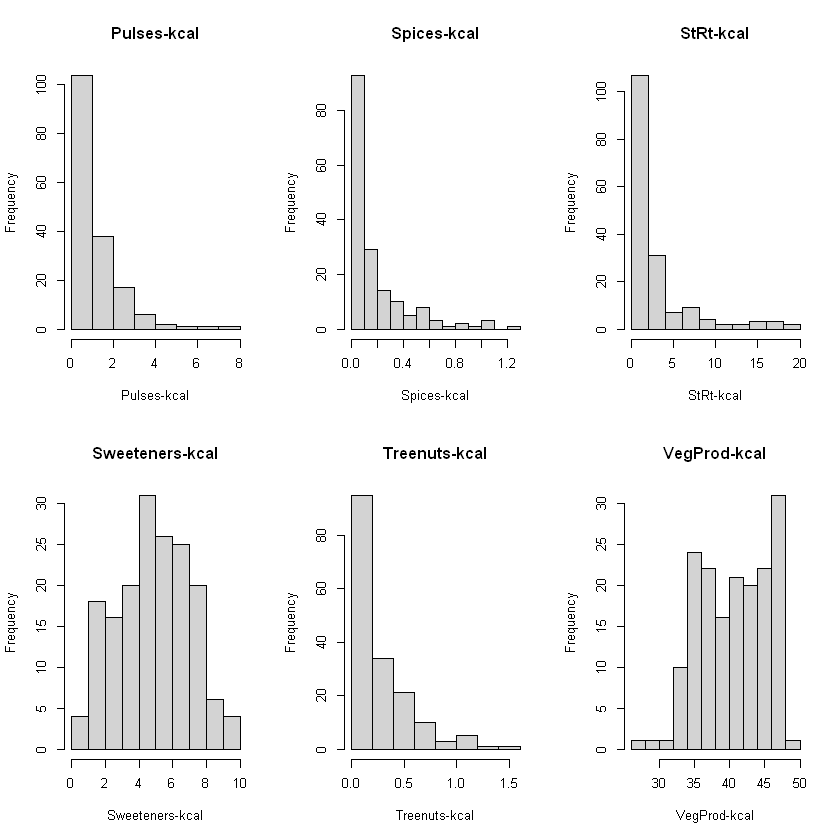

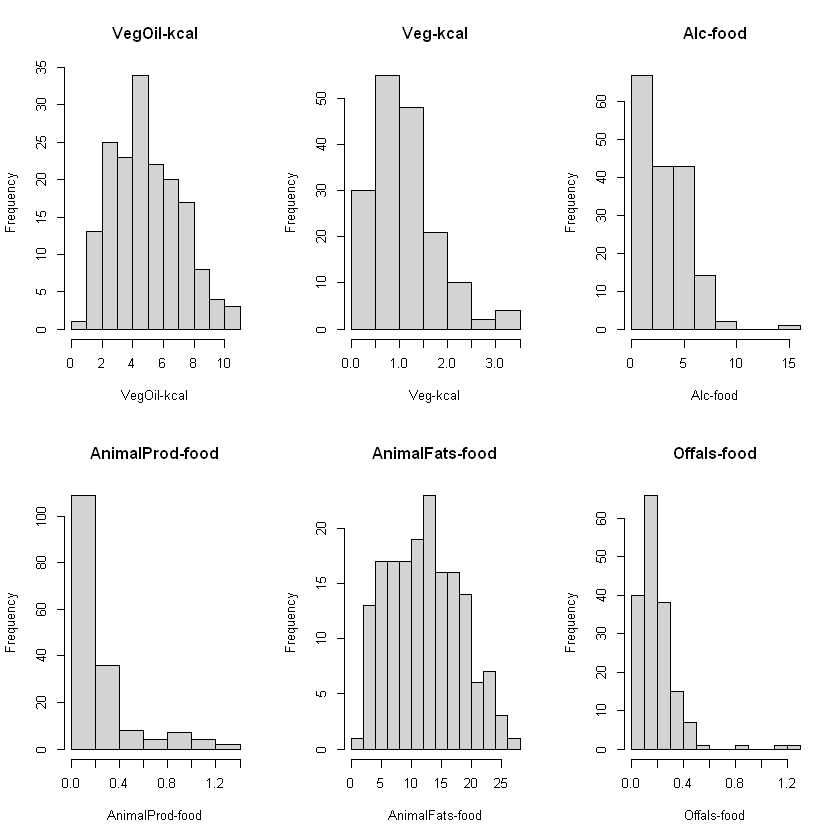

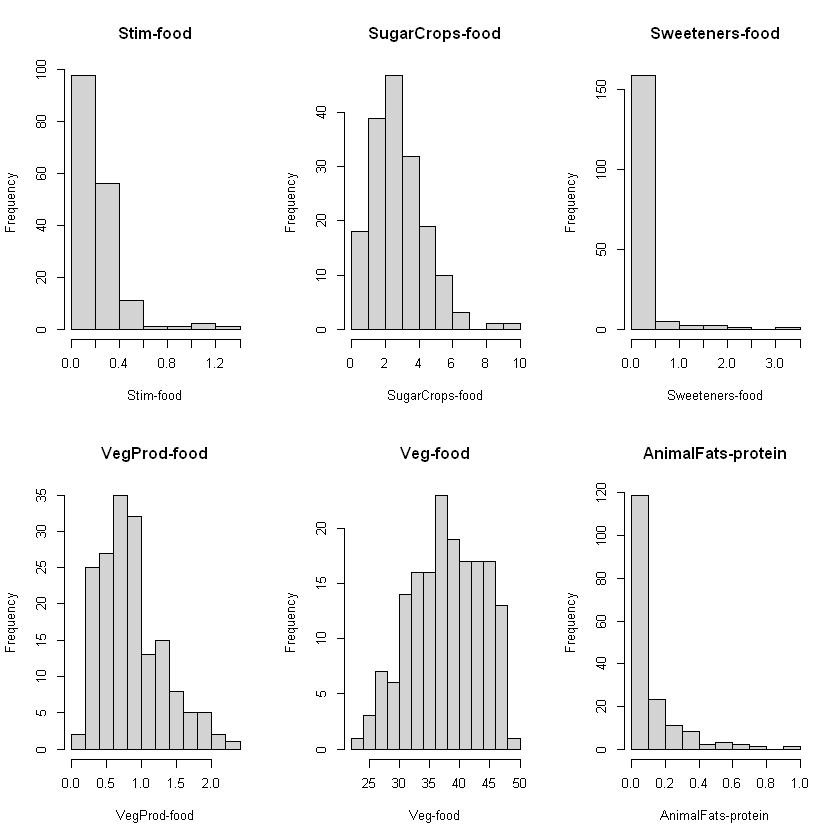

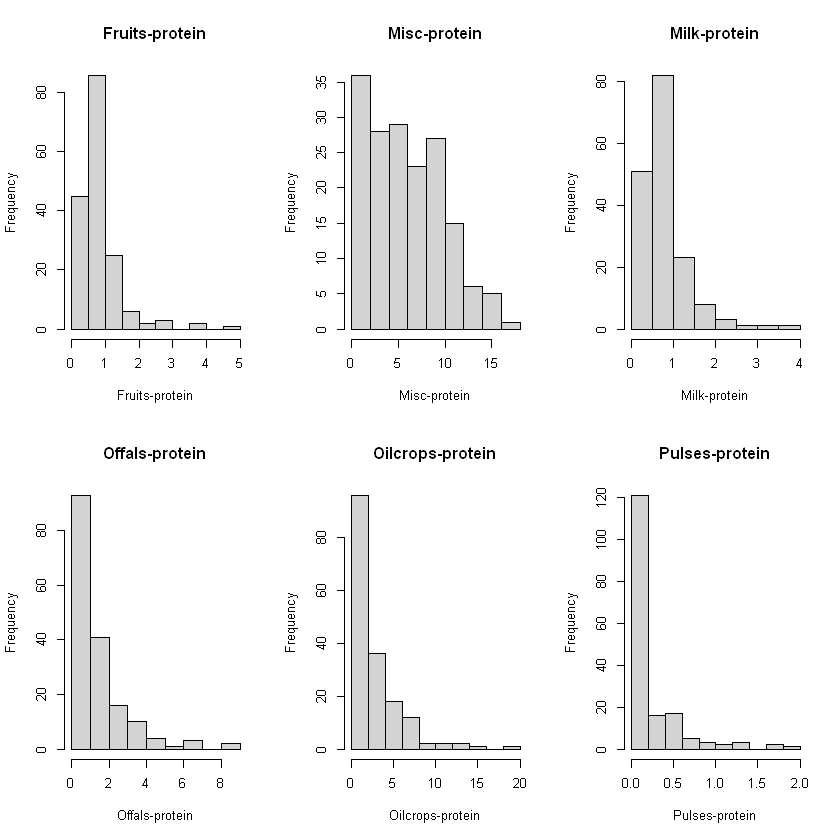

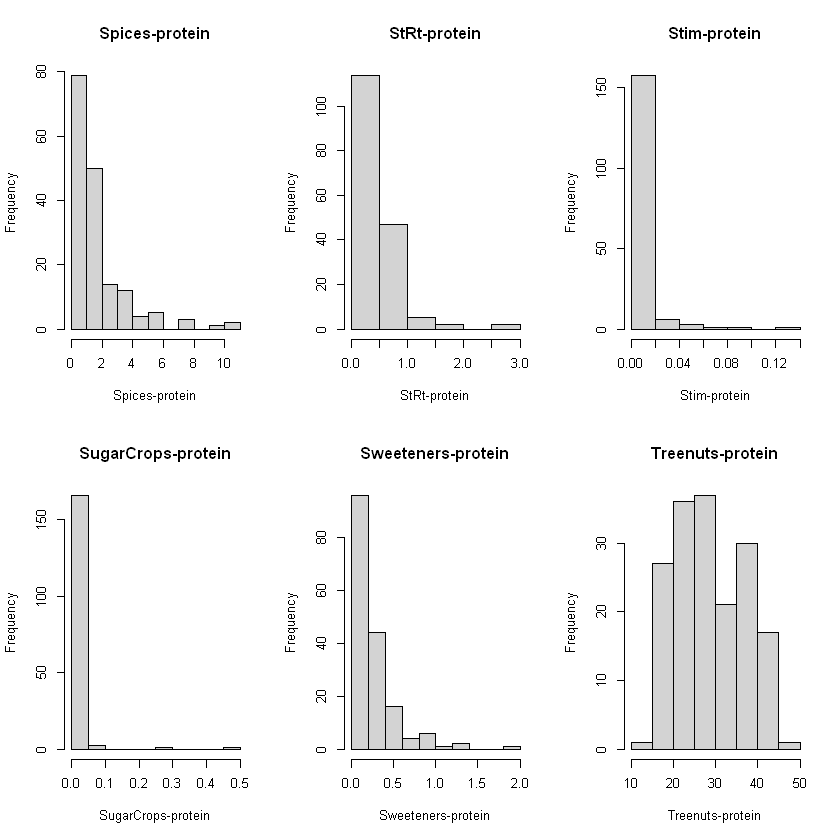

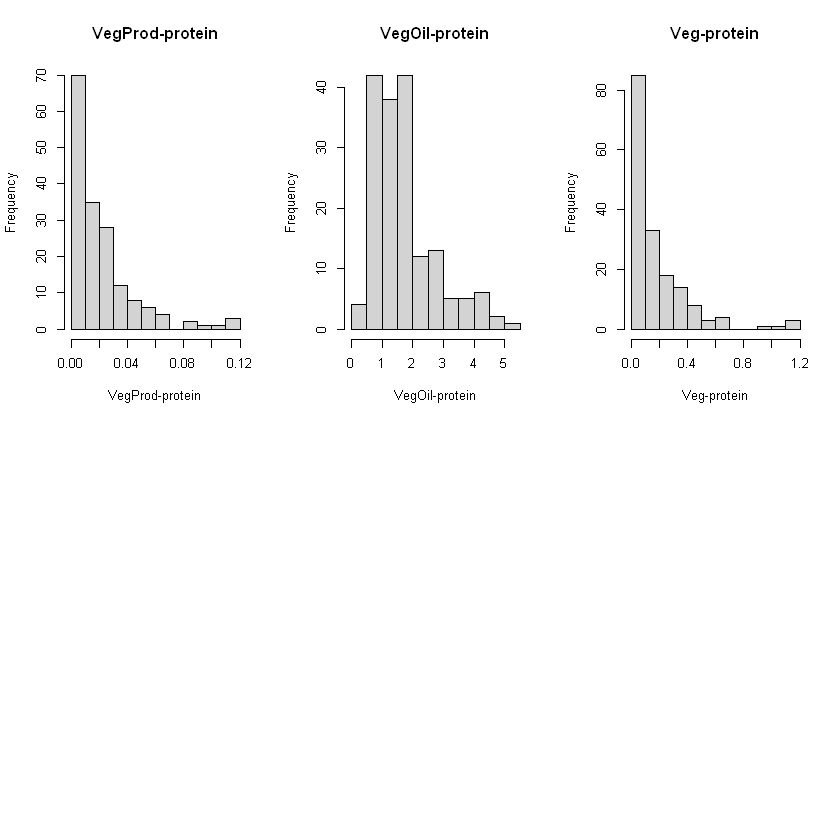

In [5]:
# quick view of histograms for all X variables
par(mfrow = c(2,3))
for (i in 2:52){
    hist(redDf[,i], xlab = names(redDf)[i], main = names(redDf)[i])
}

X variables that do not exactly have proper distributions (ie. almost all of the values are in 1 bar):<br>
* Alc - fat <br>
* Fruits - fat (possible to consider it in model if necessary) <br>
* SugarCrops - fat <br>
* Sweeteners - fat <br>
* AqProd - kcal (might leave this in for now since there are no AqProd variables) <br>
* Sweeteners - food <br>
* SugarCrops - protein 

Further reduced X variables from 51 to 45.

In [6]:
drops = c("Alc-fat", "SugarCrops-fat", "Sweeteners-fat", "AqProd-kcal", "Sweeteners-food", "SugarCrops-protein")
redDf = redDf[,!(names(redDf) %in% drops)]

In [7]:
dim(redDf)

[1] 170  53

### Checking VIF

In [8]:
VIF = diag(solve(cor(redDf[,2:46])))
ord = order(VIF, decreasing = TRUE)
VIF[ord[1:10]]

AnimalFats-food         Veg-food  AnimalProd-kcal     VegProd-kcal 
    2.096672e+06     2.094971e+06     2.389968e+05     2.379216e+05 
     Cereal-kcal Oilcrops-protein      Pulses-kcal        Milk-kcal 
    1.875222e+02     1.609627e+02     1.430869e+02     9.444375e+01 
       Meat-kcal        StRt-kcal 
    8.304747e+01     7.210245e+01

Remove the following variables due to them being highly intercorrelated with the rest X variables:<br>
* AnimalFats-food <br>
* Veg-food <br>
* AnimalProd-kcal <br>
* VegProd-kcal <br>

Further reduced X variables from 45 to 41.

In [9]:
drops = c("AnimalFats-food", "Veg-food", "AnimalProd-kcal", "VegProd-kcal")
redDf = redDf[,!(names(redDf) %in% drops)]
dim(redDf)

[1] 170  49

### Variables that can be both X and Y variables

Undernourished not a good variable to analyze, since it is not exactly a qualitative variable, nor a quatitative variable. Currently, we assume that `<2.5` means 2.5 instead of less than 2.5.

In [10]:
redDf$Undernourished = ifelse(redDf$Undernourished == "<2.5", 2.5, redDf$Undernourished)
redDf$Undernourished = as.numeric(redDf$Undernourished)

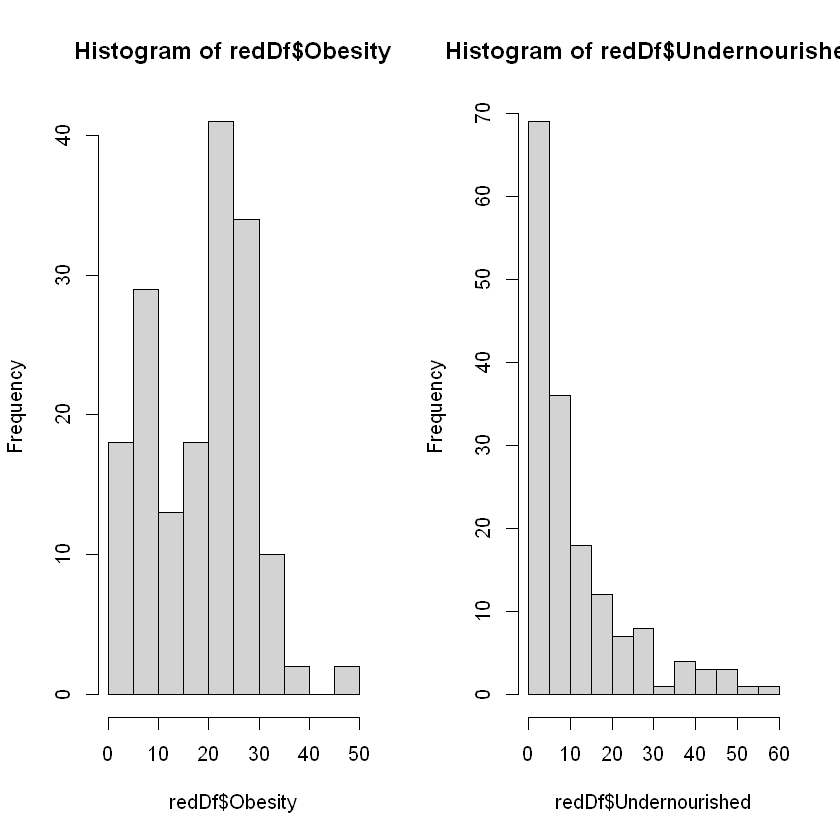

In [11]:
par(mfrow = c(1,2))
hist(redDf$Obesity)
hist(redDf$Undernourished)

In [12]:
cor(na.omit(redDf)[,43:48])
dim(na.omit(redDf))

,Obesity,Undernourished,Cfm,Deaths,Rec,Active
Obesity,1.0000000,-0.5746386,0.5065645,0.4275941,0.3946273,0.3843850
Undernourished,-0.5746386,1.0000000,-0.4205503,-0.3388421,-0.3151240,-0.3349213
Cfm,0.5065645,-0.4205503,1.0000000,0.7814585,0.8136959,0.7198402
Deaths,0.4275941,-0.3388421,0.7814585,1.0000000,0.5524387,0.6469956
Rec,0.3946273,-0.3151240,0.8136959,0.5524387,1.0000000,0.1824935
Active,0.3843850,-0.3349213,0.7198402,0.6469956,0.1824935,1.0000000


[1] 152  49

In [13]:
bestCorDf = data.frame(Ord = 1:10)
for (i in 43:48){
    corrXY = cor(na.omit(redDf[,c(2:42,i)]))[,42]
    ord = order(abs(corrXY), decreasing = TRUE)
    bestCorDf = cbind(bestCorDf, 
                      names(corrXY[ord[2:11]]), 
                      corrXY[ord[2:11]])
}
names(bestCorDf) = c("Ord", "varObs", "corObs", "varUnd", "corUnd", "varCfm", "corCfm",
                    "varD", "corD", "varRec", "corRec", "varAct", "corAct")
row.names(bestCorDf) = NULL
bestCorDf

Ord,varObs,corObs,varUnd,corUnd,varCfm,corCfm,varD,corD,varRec,corRec,varAct,corAct
<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,Treenuts-protein,-0.6076098,Treenuts-protein,0.6017436,Misc-protein,0.5182897,Eggs-kcal,0.4104349,Eggs-kcal,0.3623590,Misc-protein,0.5001827
2,Sweeteners-kcal,0.6034174,Eggs-kcal,-0.5443135,Treenuts-protein,-0.4988549,Treenuts-protein,-0.3815297,Treenuts-protein,-0.3538279,AnimalProd-food,0.4812343
3,Cereal-kcal,-0.5442195,Misc-protein,-0.4959936,Eggs-kcal,0.4679694,Misc-protein,0.3570698,Stim-fat,0.3321230,AnimalFats-fat,0.4621211
4,Cereal-fat,-0.4881416,Cereal-fat,0.4904696,Cereal-kcal,-0.3924127,Offals-protein,-0.3082560,Misc-protein,0.3226568,Treenuts-protein,-0.4296253
5,Meat-kcal,0.4867100,Oilcrops-protein,0.4593580,AnimalFats-fat,0.3903844,Cereal-fat,-0.3043984,Offals-protein,-0.2966623,Cereal-kcal,-0.4154095
6,Misc-protein,0.4806966,Meat-kcal,-0.4488758,Cereal-fat,-0.3816709,Meat-kcal,0.3032494,Milk-fat,0.2661331,AnimalFats-protein,0.4081776
7,SugarCrops-food,0.4524954,StRt-kcal,0.4320756,Offals-protein,-0.3717336,Sweeteners-kcal,0.2984503,Sweeteners-kcal,0.2628620,VegProd-protein,0.3992126
8,Eggs-kcal,0.4433696,Pulses-kcal,0.4251309,Milk-fat,0.3607964,Cereal-kcal,-0.2946762,Meat-kcal,0.2501634,Eggs-kcal,0.3653867
9,AnimalFats-fat,0.3951647,Veg-kcal,-0.4133945,Stim-fat,0.3478660,Oilcrops-kcal,-0.2798706,Oilcrops-kcal,-0.2497440,Cereal-fat,-0.3579866


1. Variables that have high correlation with Obesity and Undernourished: <br>
 * Treenuts - protein <br>
 * VegeProd - kcal <br>
 * AnimalProd - kcal <br>
 * AnimalFats - food <br>
 * Veg - food <br>
 * Cereal - fat <br>
 * Meat - kcal <br>
 * Misc - protein <br>
Note: In general, variables that have high positive correlation with obesity tend to have high negative correlation with undernourished, and vice versa.

2. Variables that have high correlation with confirmed, death, recovered, active cases: <br>
 * Misc - protein <br>
 * Treenuts - protein <br>
 * VegProd - kcal <br>
 * AnimalProd - kcal <br>
 * AnimalFats - food <br>
 * Veg - food <br>
 * Eggs - kcal (not in Active) <br>
 Note: These important variables could mean something!

### Distribution of Y variables

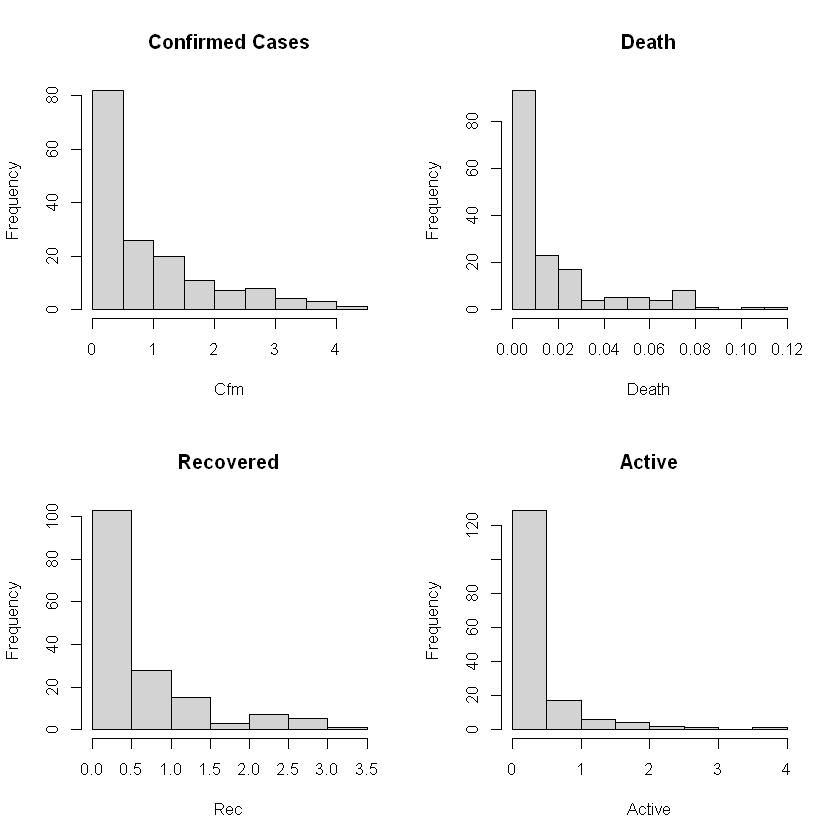

In [14]:
par(mfrow = c(2,2))
hist(fat$Cfm, xlab = "Cfm", main = "Confirmed Cases")
hist(fat$Death, xlab = "Death", main = "Death")
hist(fat$Rec, xlab = "Rec", main = "Recovered")
hist(fat$Active, xlab = "Active", main = "Active")

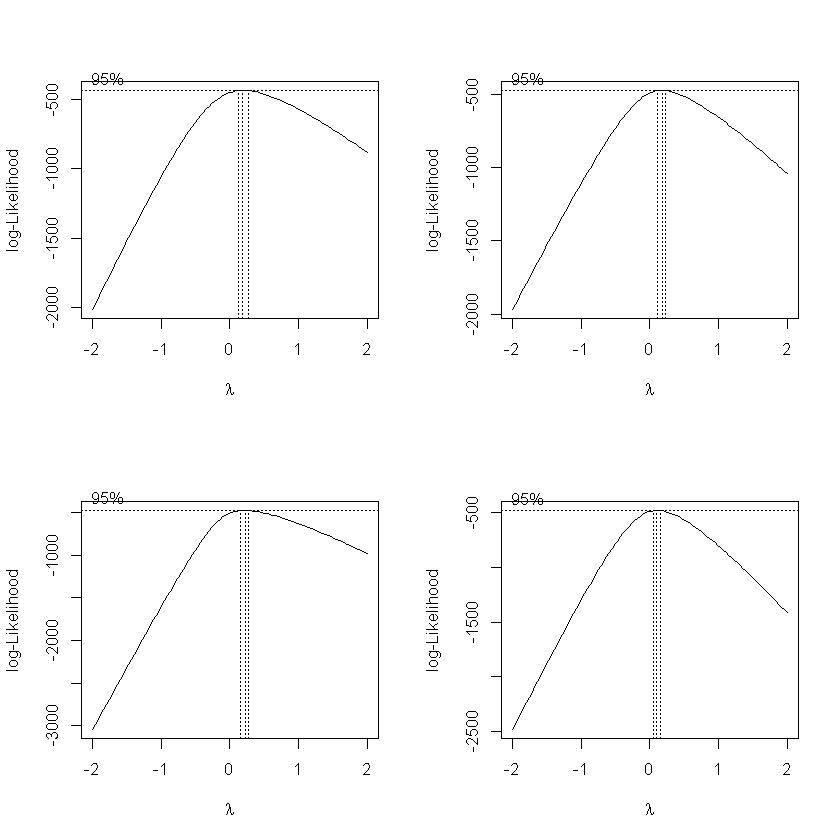

In [15]:
library(MASS)
par(mfrow = c(2,2))
fit = lm(Cfm ~ ., data = redDf[c(2:42, 45)]); boxcox(fit)
fit = lm(I(Deaths+.00001) ~ ., data = redDf[c(2:42, 46)]); boxcox(fit)
fit = lm(I(Rec+.00001) ~ ., data = redDf[c(2:42, 47)]); boxcox(fit)
fit = lm(I(Active+.00001) ~ ., data = redDf[c(2:42, 48)]); boxcox(fit)

In all cases, the best transformation would be the log transformation.

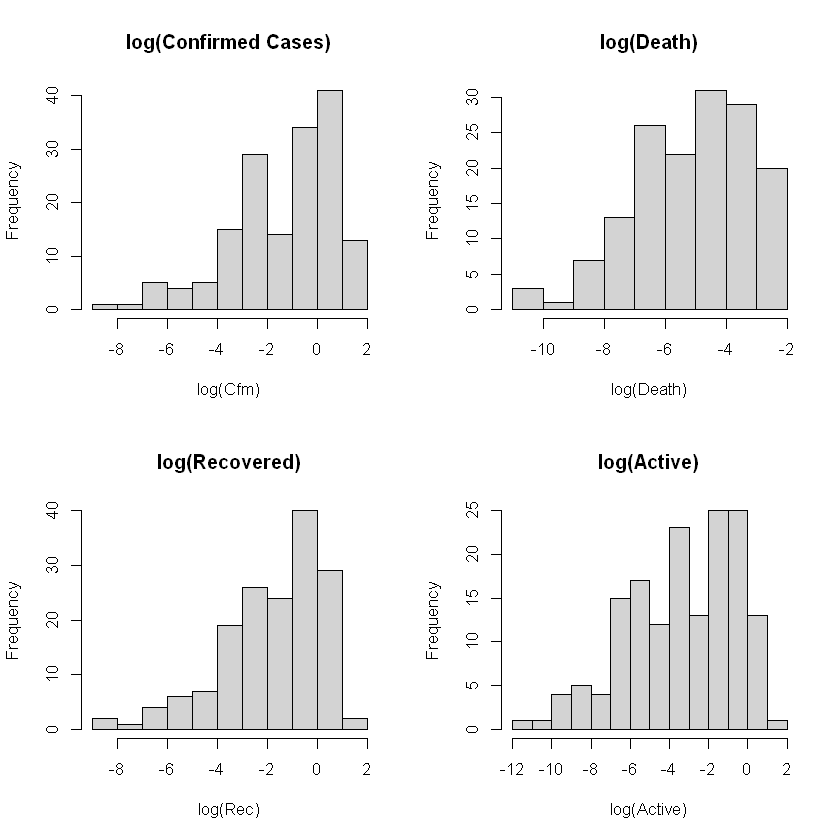

In [16]:
par(mfrow = c(2,2))
hist(log(fat$Cfm), xlab = "log(Cfm)", main = "log(Confirmed Cases)")
hist(log(fat$Death), xlab = "log(Death)", main = "log(Death)")
hist(log(fat$Rec), xlab = "log(Rec)", main = "log(Recovered)")
hist(log(fat$Active), xlab = "log(Active)", main = "log(Active)")

For all of them, log transformation is the best way to go according to box cox. However, we need to add extremely small values like 0.0000001 into the deaths, recovery, and active cases since they consist zero values.

## Model Fitting

### Omit NA's and split data to train and validation

In [17]:
# splitting dataframes into confirmed, deaths, recovery, active cases vs diet
cfmDf = na.omit(redDf[,c(1:42, 45)])
deathDf = na.omit(redDf[,c(1:42,46)])
recDf = na.omit(redDf[,c(1:42,47)])
actDf = na.omit(redDf[,c(1:42,48)])

# check dimensions of each dataframe
dim(cfmDf)
dim(deathDf)
dim(recDf)
dim(actDf)

[1] 162  43

[1] 162  43

[1] 162  43

[1] 160  43

In [18]:
# transformation of Y variables
cfmDf$Cfm = log(cfmDf$Cfm)
deathDf$Deaths = log(deathDf$Deaths + 1e-12)
recDf$Rec = log(recDf$Rec + 1e-12)
actDf$Active = log(actDf$Active + 1e-12)

In [73]:
# split data into train and validation
set.seed(10)
ind1 = sample(1:dim(cfmDf)[1], size = 0.8*dim(cfmDf)[1])
ind2 = sample(1:dim(actDf)[1], size = 0.8*dim(actDf)[1])
# train
cfmDf.train = cfmDf[ind1,]
deathDf.train = deathDf[ind1,]
recDf.train = recDf[ind1,]
actDf.train = actDf[ind2,]
#valid
cfmDf.valid = cfmDf[-ind1,]
deathDf.valid = deathDf[-ind1,]
recDf.valid = recDf[-ind1,]
actDf.valid = actDf[-ind2,]

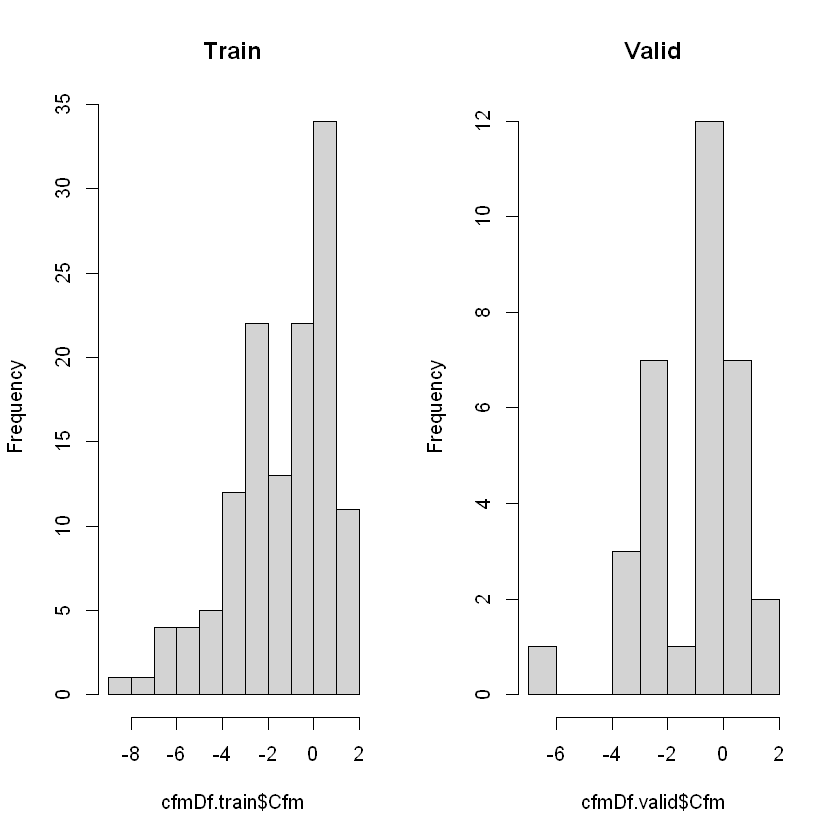

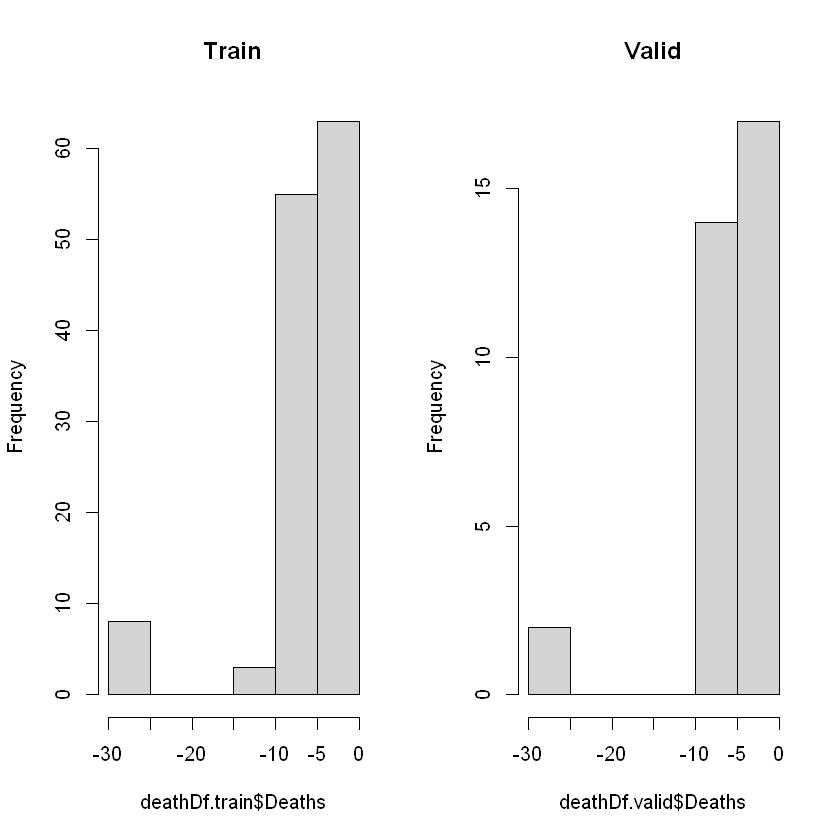

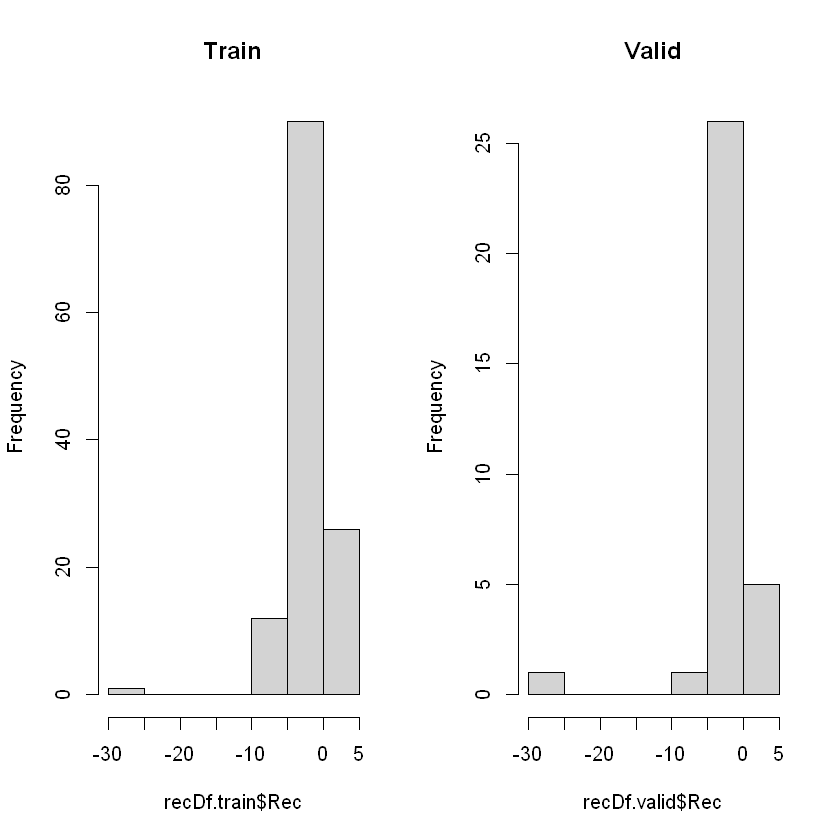

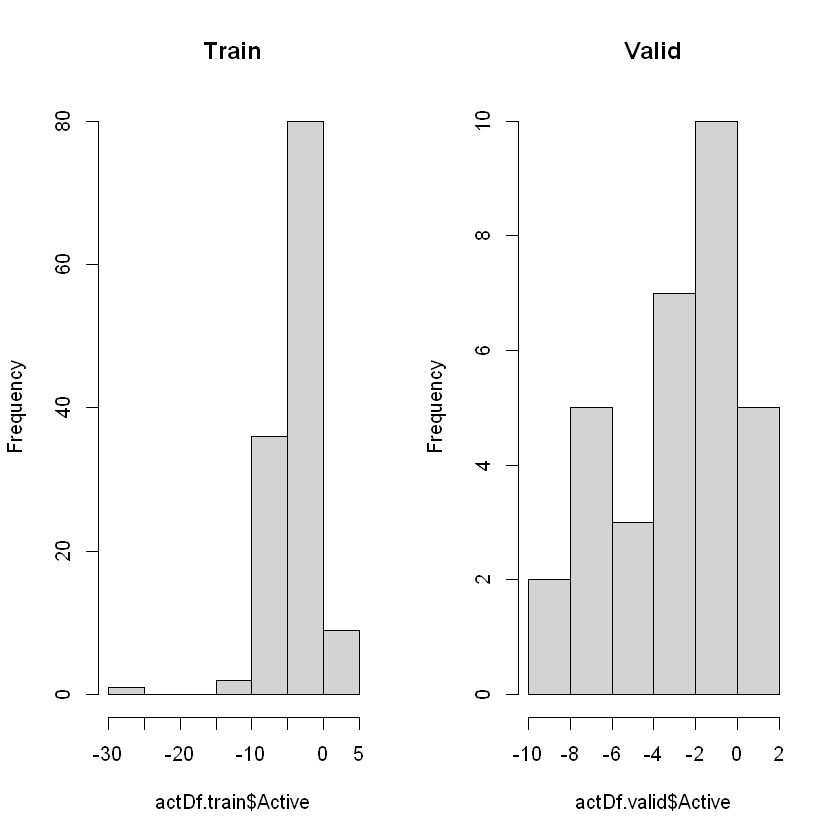

In [74]:
par(mfrow = c(1,2))
hist(cfmDf.train$Cfm, main = "Train")
hist(cfmDf.valid$Cfm, main = "Valid")
hist(deathDf.train$Deaths, main = "Train")
hist(deathDf.valid$Deaths, main = "Valid")
hist(recDf.train$Rec, main = "Train")
hist(recDf.valid$Rec, main = "Valid")
hist(actDf.train$Active, main = "Train")
hist(actDf.valid$Active, main = "Valid")

### Model Fitting for Confirmed Cases

In [89]:
cfm.fit1 = lm(Cfm ~ 1, data = cfmDf.train[,-1])

# fitting AIC model
cfm.fit2 = stepAIC(cfm.fit1, 
                   scope = list(upper = lm(Cfm ~ ., data = cfmDf.train[,-1]),
                               lower = cfm.fit1),
                   direction = "both", trace = 0, k = 2)
cfm.fit4 = stepAIC(cfm.fit1,
                  scope = list(upper = lm(Cfm ~ (`Offals-protein` + `Sweeteners-kcal` + `Treenuts-kcal` + 
                                            `Meat-kcal` + `Alc-food` + `Treenuts-protein` + `Seafood-kcal` + 
                                            `Stim-fat` + `Fruits-protein` + `Pulses-protein` + `Eggs-kcal`)^2, 
                                        data = cfmDf.train[, -1]),
                              lower= cfm.fit1),
                  direction = "both", trace = 0, k = 2)

In [90]:
# fitting BIC model
cfm.fit3 = stepAIC(cfm.fit1, 
                   scope = list(upper = lm(Cfm ~ .^2, data = cfmDf.train[,-1]),
                               lower = cfm.fit1),
                   direction = "both", trace = 0, k = log(nrow(cfmDf.train)))

In [91]:
summary(cfm.fit4)


Call:
lm(formula = Cfm ~ `Offals-protein` + `Treenuts-protein` + `Meat-kcal` + 
    `Seafood-kcal` + `Treenuts-kcal` + `Stim-fat` + `Eggs-kcal` + 
    `Offals-protein`:`Meat-kcal` + `Treenuts-protein`:`Meat-kcal` + 
    `Seafood-kcal`:`Stim-fat` + `Seafood-kcal`:`Eggs-kcal` + 
    `Offals-protein`:`Stim-fat` + `Treenuts-kcal`:`Stim-fat`, 
    data = cfmDf.train[, -1])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3389 -0.5901  0.1981  0.8946  2.4884 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     6.414996   1.785121   3.594 0.000481 ***
`Offals-protein`                0.123466   0.151034   0.817 0.415347    
`Treenuts-protein`             -0.236033   0.043278  -5.454 2.86e-07 ***
`Meat-kcal`                    -0.908219   0.214228  -4.239 4.55e-05 ***
`Seafood-kcal`                 -0.859824   0.557401  -1.543 0.125685    
`Treenuts-kcal`                 1.446604   0.626572   2.309 0.022743 *  
`Stim-fa

In [92]:
summary(cfm.fit3)


Call:
lm(formula = Cfm ~ `Misc-protein` + `Offals-protein` + `Sweeteners-kcal`, 
    data = cfmDf.train[, -1])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6750 -0.6556  0.2785  1.1804  3.1775 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -3.03880    0.48213  -6.303 4.58e-09 ***
`Misc-protein`     0.19750    0.04206   4.695 6.88e-06 ***
`Offals-protein`  -0.34874    0.10714  -3.255  0.00146 ** 
`Sweeteners-kcal`  0.19390    0.07254   2.673  0.00852 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.6 on 125 degrees of freedom
Multiple R-squared:  0.4354,	Adjusted R-squared:  0.4219 
F-statistic: 32.13 on 3 and 125 DF,  p-value: 1.82e-15


### Model Fitting for Deaths

In [95]:
death.fit1 = lm(Deaths ~ 1, data = deathDf.train[,-1])
# fitting AIC model
death.fit2 = stepAIC(death.fit1, 
                   scope = list(upper = lm(Deaths ~ ., data = deathDf.train[,-1]),
                               lower = death.fit1),
                   direction = "both", trace = 0, k = 2)
death.fit4 = stepAIC(death.fit1, 
                    scope = list(upper = lm(formula = Deaths ~ (`Misc-protein` + `Meat-kcal` + `Eggs-kcal` + 
                                            `Spices-kcal` + `Pulses-protein` + `Treenuts-kcal` + `Stim-food` + 
                                            `Stim-protein`)^2,
                                            data = deathDf.train[, -1]),
                                lower = death.fit1),
                    direction = "both", trace = 0, k = 2)

In [97]:
# fitting BIC model
death.fit3 = stepAIC(death.fit1, 
                   scope = list(upper = lm(Deaths ~ .^2, data = deathDf.train[,-1]),
                               lower = death.fit1),
                   direction = "both", trace = 0, k = log(nrow(deathDf.train)))

In [96]:
summary(death.fit4)


Call:
lm(formula = Deaths ~ `Misc-protein` + `Meat-kcal` + `Eggs-kcal` + 
    `Spices-kcal` + `Pulses-protein` + `Treenuts-kcal` + `Stim-food` + 
    `Misc-protein`:`Pulses-protein` + `Meat-kcal`:`Stim-food` + 
    `Misc-protein`:`Spices-kcal` + `Treenuts-kcal`:`Stim-food` + 
    `Eggs-kcal`:`Spices-kcal` + `Misc-protein`:`Meat-kcal`, data = deathDf.train[, 
    -1])

Residuals:
     Min       1Q   Median       3Q      Max 
-18.7954  -1.4586   0.0234   2.5637   7.8467 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -4.23330    1.53028  -2.766 0.006607 ** 
`Misc-protein`                    0.62715    0.30948   2.026 0.045027 *  
`Meat-kcal`                      -1.32483    0.37895  -3.496 0.000672 ***
`Eggs-kcal`                       8.47001    2.28104   3.713 0.000317 ***
`Spices-kcal`                    -3.36935   14.19822  -0.237 0.812840    
`Pulses-protein`                 -0.95336    9.09883  -0.105 0.916

In [98]:
summary(death.fit3)


Call:
lm(formula = Deaths ~ `Misc-protein` + `Meat-kcal` + `Eggs-kcal` + 
    `Spices-kcal` + `Pulses-protein` + `Treenuts-kcal` + `Misc-protein`:`Pulses-protein`, 
    data = deathDf.train[, -1])

Residuals:
     Min       1Q   Median       3Q      Max 
-18.9234  -1.3754   0.5383   2.6111   7.9081 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -6.3599     1.1203  -5.677 9.59e-08 ***
`Misc-protein`                    0.1566     0.1572   0.997 0.320968    
`Meat-kcal`                      -1.0167     0.2448  -4.153 6.14e-05 ***
`Eggs-kcal`                       6.6009     1.7974   3.673 0.000359 ***
`Spices-kcal`                   -36.0615     9.0209  -3.998 0.000110 ***
`Pulses-protein`                 18.1500     5.6162   3.232 0.001585 ** 
`Treenuts-kcal`                   4.0520     1.5716   2.578 0.011129 *  
`Misc-protein`:`Pulses-protein`   1.0344     0.4570   2.264 0.025379 *  
---
Signif. codes:  0 '***

### Model Fitting for Recovery

In [99]:
rec.fit1 = lm(Rec ~ 1, data = recDf.train[,-1])
# fitting AIC model
rec.fit2 = stepAIC(rec.fit1, 
                   scope = list(upper = lm(Rec ~ .^2, data = recDf.train[,-1]),
                               lower = rec.fit1),
                   direction = "both", trace = 0, k = 2)

In [101]:
# fitting BIC model
rec.fit3 = stepAIC(rec.fit1, 
                   scope = list(upper = lm(Rec ~ .^2, data = recDf.train[,-1]),
                               lower = rec.fit1),
                   direction = "both", trace = 0, k = log(nrow(recDf.train)))

In [100]:
summary(rec.fit2)


Call:
lm(formula = Rec ~ `Stim-fat` + `Sweeteners-kcal` + `StRt-protein` + 
    `Offals-protein` + `VegProd-food` + `Stim-fat`:`StRt-protein` + 
    `StRt-protein`:`VegProd-food`, data = recDf.train[, -1])

Residuals:
     Min       1Q   Median       3Q      Max 
-22.5309  -0.7042   0.3896   1.3049   4.3215 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -1.5393     1.1061  -1.392 0.166562    
`Stim-fat`                      0.8687     0.5652   1.537 0.126930    
`Sweeteners-kcal`               0.2041     0.1233   1.656 0.100339    
`StRt-protein`                 -5.8464     1.5583  -3.752 0.000271 ***
`Offals-protein`               -0.4039     0.1768  -2.285 0.024067 *  
`VegProd-food`                 -0.9112     0.9840  -0.926 0.356282    
`Stim-fat`:`StRt-protein`       0.9502     0.5361   1.773 0.078804 .  
`StRt-protein`:`VegProd-food`   4.1232     1.8380   2.243 0.026694 *  
---
Signif. codes:  0 '***' 0.001 '

In [102]:
summary(rec.fit3)


Call:
lm(formula = Rec ~ `Stim-fat` + `Sweeteners-kcal` + `StRt-protein`, 
    data = recDf.train[, -1])

Residuals:
     Min       1Q   Median       3Q      Max 
-23.8603  -0.8598   0.5738   1.5036   3.8462 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -3.7063     0.6554  -5.655 1.01e-07 ***
`Stim-fat`          1.5956     0.3982   4.007 0.000105 ***
`Sweeteners-kcal`   0.3128     0.1158   2.701 0.007876 ** 
`StRt-protein`     -1.9508     0.7566  -2.578 0.011092 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.802 on 125 degrees of freedom
Multiple R-squared:  0.1731,	Adjusted R-squared:  0.1532 
F-statistic: 8.721 on 3 and 125 DF,  p-value: 2.687e-05


### Model Fitting for Active Cases

In [118]:
act.fit1 = lm(Active ~ 1, data = actDf.train[,-1])
# fitting AIC model
act.fit2 = stepAIC(act.fit1, 
                   scope = list(upper = lm(Active ~ ., data = actDf.train[,-1]),
                               lower = act.fit1),
                   direction = "both", trace = 0, k = 2)
act.fit4 = stepAIC(act.fit1,
                  scope = list(upper = lm(formula = Active ~ (`Misc-protein` + `Offals-protein` + `Spices-protein` + 
                                                `Eggs-kcal` + `Meat-kcal` + `Stim-fat` + `Stim-protein`)^2, 
                                          data = actDf.train[, -1]),
                              lower = act.fit1),
                  direction = "both", trace = 0, k = 2)

In [121]:
# fitting BIC model
act.fit3 = stepAIC(act.fit1, 
                   scope = list(upper = lm(Active ~ .^2, data = actDf.train[,-1]),
                               lower = act.fit1),
                   direction = "both", trace = 0, k = log(nrow(actDf.train)))

In [120]:
summary(act.fit4)


Call:
lm(formula = Active ~ `Misc-protein` + `Offals-protein` + `Meat-kcal` + 
    `Eggs-kcal` + `Spices-protein` + `Stim-fat` + `Meat-kcal`:`Spices-protein` + 
    `Misc-protein`:`Stim-fat` + `Misc-protein`:`Meat-kcal`, data = actDf.train[, 
    -1])

Residuals:
     Min       1Q   Median       3Q      Max 
-20.4670  -1.0227   0.0793   1.3735   5.2030 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -4.70665    1.17906  -3.992 0.000114 ***
`Misc-protein`                0.23098    0.15794   1.462 0.146279    
`Offals-protein`             -0.36725    0.18088  -2.030 0.044574 *  
`Meat-kcal`                  -1.00902    0.26328  -3.833 0.000205 ***
`Eggs-kcal`                   2.75322    0.95374   2.887 0.004630 ** 
`Spices-protein`             -0.09073    0.24341  -0.373 0.710016    
`Stim-fat`                    2.78283    1.09409   2.544 0.012268 *  
`Meat-kcal`:`Spices-protein`  0.18016    0.07786   2.314 0.022406 * 

In [122]:
summary(act.fit3)


Call:
lm(formula = Active ~ `Misc-protein` + `Offals-food` + `Offals-protein`, 
    data = actDf.train[, -1])

Residuals:
     Min       1Q   Median       3Q      Max 
-23.4614  -1.0699   0.3864   1.5735   4.1982 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4.40841    0.70198  -6.280 5.21e-09 ***
`Misc-protein`    0.36323    0.07326   4.958 2.29e-06 ***
`Offals-food`    -3.79951    1.45203  -2.617  0.00998 ** 
`Offals-protein` -0.43009    0.18819  -2.285  0.02399 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.854 on 124 degrees of freedom
Multiple R-squared:  0.3374,	Adjusted R-squared:  0.3214 
F-statistic: 21.05 on 3 and 124 DF,  p-value: 4.345e-11


## Model Diagnostics

## AIC vs BIC Models

Notes: <br>
* AIC models have smaller $Press_p$ values for confirmed, recovery, and active cases. The other way round for death cases. <br>
* Adjusted $R^2$ is better in AIC models for all cases. <br>
* $C_p$ values smaller in AIC models for all cases. <br>
* MSE values are smaller in AIC models for all cases.

What it means: <br>
* BIC models' $Press_p$ values are closer to their respective SSEs than AIC models. BIC models have higher predictive ability.
* AIC models have $C_p$ values closer to their respective $p$. AIC models have smaller bias.
* In the case of Combined cases, the MSE are smaller than the rest, ie. better fit. The MSPE of the validation data are also very small, indicating that there is no severe overfitting.
* Small $C_p$ values means there is less model bias, and this is the case for all AIC models. Note that this is due to the model being larger than their BIC counterpart.
* In general, MSPE aren't too much larger than SSE/n, indicating no severe overfitting in any model.
* Choose AIC models in all cases.
* Adjusted $R^2$ values are largest in Confirmed cases models (0.58), followed by Death cases models (0.43), ie. recovery rate has way less correlation with diet compared to number of cases and deaths.

In [109]:
# compute sse, mse, R2, adjusted R2, Cp, Pressp statistics
modelDiag = function(obj, sigma2){
    n = length(obj$residuals)
    p = length(obj$coefficients)
    h = influence(obj)$hat
    sse = sum(obj$residuals^2)
    mse = sse/obj$df.residual
    r2 = summary(obj)$r.squared
    adjr2 = summary(obj)$adj.r.squared
    cp = sse/sigma2 - (n - 2*p)
    pressp = sum((obj$residuals/(1-h))^2)
    return (c(p = p, SSE = sse, MSE = mse, R2 = r2, Adj.R2 = adjr2, Cp = cp, PRESSp = pressp))
}

getMspe = function(obj){
    return (c(MSPE = sum(obj$residuals^2)/length(obj$fitted.values)))
}

modelValid = function(data, formula1, formula2){
    fit1 = lm(formula = formula1, data = data)
    fit2 = lm(formula = formula2, data = data)
    return (data.frame(AIC.valid = getMspe(fit1), BIC.valid = getMspe(fit2)))
}

#### Confirmed Cases

In [115]:
# confirmed cases
cfm.fitfull = lm(formula = Cfm ~ `Offals-protein` + `Treenuts-protein` + `Meat-kcal` + 
                `Seafood-kcal` + `Treenuts-kcal` + `Stim-fat` + `Eggs-kcal` + 
                `Offals-protein`:`Meat-kcal` + `Treenuts-protein`:`Meat-kcal` + 
                `Seafood-kcal`:`Stim-fat` + `Seafood-kcal`:`Eggs-kcal` + 
                `Offals-protein`:`Stim-fat` + `Treenuts-kcal`:`Stim-fat` + 
                 `Misc-protein` + `Sweeteners-kcal`, data = cfmDf.train[,-1])
cfm.fit4.diag = modelDiag(cfm.fit4, sum(cfm.fitfull$residuals^2)/cfm.fitfull$df.residual) # train model
cfm.fit3.diag = modelDiag(cfm.fit3, sum(cfm.fitfull$residuals^2)/cfm.fitfull$df.residual)
cfm.diagComp = data.frame(AIC.train = cfm.fit4.diag, BIC.train = cfm.fit3.diag)
cfm.diagComp

cfm.diagComp.v = modelValid(cfmDf.valid[,-1], cfm.fit4$call$formula, cfm.fit3$call$formula) # valid model
cfm.diagComp.v

,AIC.train,BIC.train
,<dbl>,<dbl>
p,14.0000000,4.0000000
SSE,215.0129863,320.1323906
MSE,1.8696781,2.5610591
R2,0.6208021,0.4354130
Adj.R2,0.5779363,0.4218629
Cp,13.1207361,48.9141280
PRESSp,283.5852297,344.6421290


,AIC.valid,BIC.valid
,<dbl>,<dbl>
MSPE,0.5825694,1.596751


#### Death Cases

In [114]:
# death cases
death.fitfull = death.fit4
death.fit4.diag = modelDiag(death.fit4, sum(death.fitfull$residuals^2)/death.fitfull$df.residual) # train model
death.fit3.diag = modelDiag(death.fit3, sum(death.fitfull$residuals^2)/death.fitfull$df.residual)
death.diagComp = data.frame(AIC.train = death.fit4.diag, BIC.train = death.fit3.diag)
death.diagComp

death.diagComp.v = modelValid(deathDf.valid[,-1], death.fit4$call$formula, death.fit3$call$formula) # valid model
death.diagComp.v

,AIC.train,BIC.train
,<dbl>,<dbl>
p,14.0000000,8.0000000
SSE,2124.4905585,2803.9040830
MSE,18.4738309,23.1727610
R2,0.4949605,0.3334485
Adj.R2,0.4378691,0.2948877
Cp,14.0000000,38.7770782
PRESSp,2867.8353087,3332.4299028


,AIC.valid,BIC.valid
,<dbl>,<dbl>
MSPE,13.78182,14.44391


#### Recovery Cases

In [125]:
# recovery cases
rec.fitfull = rec.fit2
rec.fit2.diag = modelDiag(rec.fit2, sum(rec.fitfull$residuals^2)/rec.fitfull$df.residual) # train model
rec.fit3.diag = modelDiag(rec.fit3, sum(rec.fitfull$residuals^2)/rec.fitfull$df.residual)
rec.diagComp = data.frame(AIC.train = rec.fit2.diag, BIC.train = rec.fit3.diag)
rec.diagComp

rec.diagComp.v = modelValid(recDf.valid[,-1], rec.fit2$call$formula, rec.fit3$call$formula) # valid model
rec.diagComp.v

,AIC.train,BIC.train
,<dbl>,<dbl>
p,8.0000000,4.0000000
SSE,885.0290258,981.5769010
MSE,7.3142895,7.8526152
R2,0.2544085,0.1730719
Adj.R2,0.2112751,0.1532256
Cp,8.0000000,13.1998980
PRESSp,1071.3803123,1068.7308871


,AIC.valid,BIC.valid
,<dbl>,<dbl>
MSPE,16.81032,21.30301


#### Active Cases

In [126]:
# active cases
act.fitfull = lm(formula = Active ~ `Misc-protein` + `Offals-protein` + `Meat-kcal` + 
                    `Eggs-kcal` + `Spices-protein` + `Stim-fat` + `Meat-kcal`:`Spices-protein` + 
                    `Misc-protein`:`Stim-fat` + `Misc-protein`:`Meat-kcal` + `Offals-food`, 
                 data = actDf.train[, -1])
act.fit4.diag = modelDiag(act.fit4, sum(act.fitfull$residuals^2)/act.fitfull$df.residual) # train model
act.fit3.diag = modelDiag(act.fit3, sum(act.fitfull$residuals^2)/act.fitfull$df.residual)
act.diagComp = data.frame(AIC.train = act.fit4.diag, BIC.train = act.fit3.diag)
act.diagComp

act.diagComp.v = modelValid(actDf.valid[,-1], act.fit4$call$formula, act.fit3$call$formula) # valid model
act.diagComp.v

,AIC.train,BIC.train
,<dbl>,<dbl>
p,10.0000000,4.0000000
SSE,839.6156965,1009.9793000
MSE,7.1153873,8.1449944
R2,0.4491992,0.3374380
Adj.R2,0.4071889,0.3214083
Cp,10.5329552,22.5840793
PRESSp,992.4198818,1070.2648665


,AIC.valid,BIC.valid
,<dbl>,<dbl>
MSPE,2.723729,3.416426


### Looking for possible outliers

In [127]:
getCooksDist = function(obj){
    e = obj$residuals
    p = length(obj$coefficients)
    mse = sum(e^2)/obj$df.residual
    h = influence(obj)$hat
    return (c(e^2*h/(p*mse*(1-h)^2)))
}

### Confirmed Cases

Notes: <br>
* Data is slightly left skewed, no obvious non-constant variance based on residuals vs fitted plot
* Percentage changes between fitted value with and without possible outlier is 0.002% to 87.6%. There is extremely large influence on a few predictions and thus has to be removed.

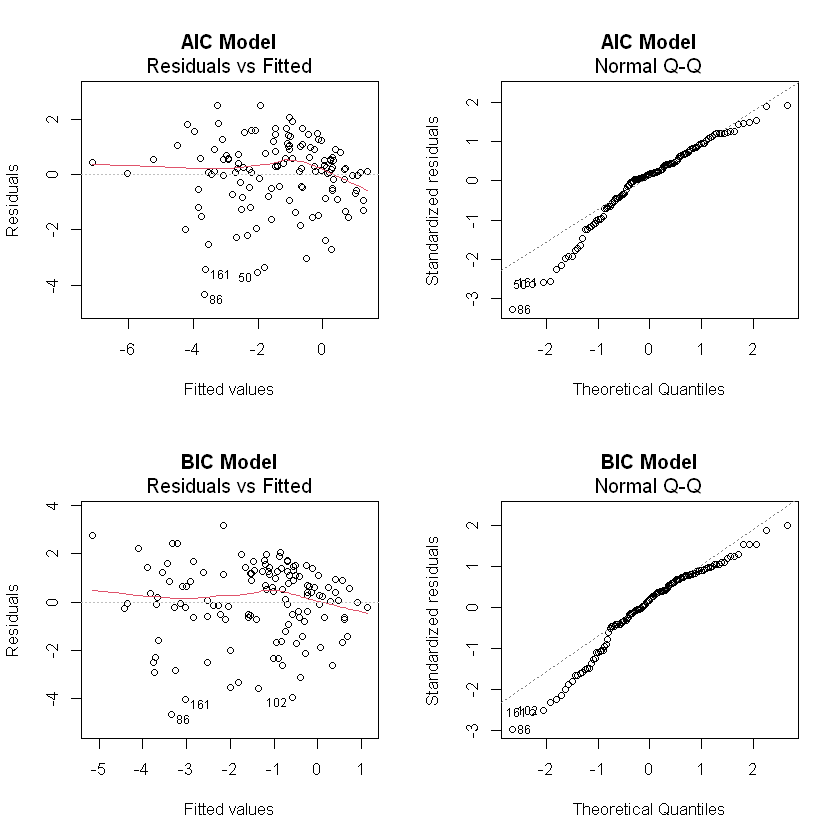

,Country,Cfm,CooksDist
,<chr>,<dbl>,<dbl>
35,Cote d'Ivoire,-2.5308996,0.33190571
96,Maldives,0.7954902,0.29945358
102,Mongolia,-4.5309347,0.11549854
42,Dominica,-2.4361165,0.06306607
25,Cambodia,-6.2572547,0.05391309
86,Lao People's Democratic Republic,-8.0121840,0.05358458
169,Zambia,-2.3835620,0.04647382
150,Thailand,-5.1548258,0.04188236


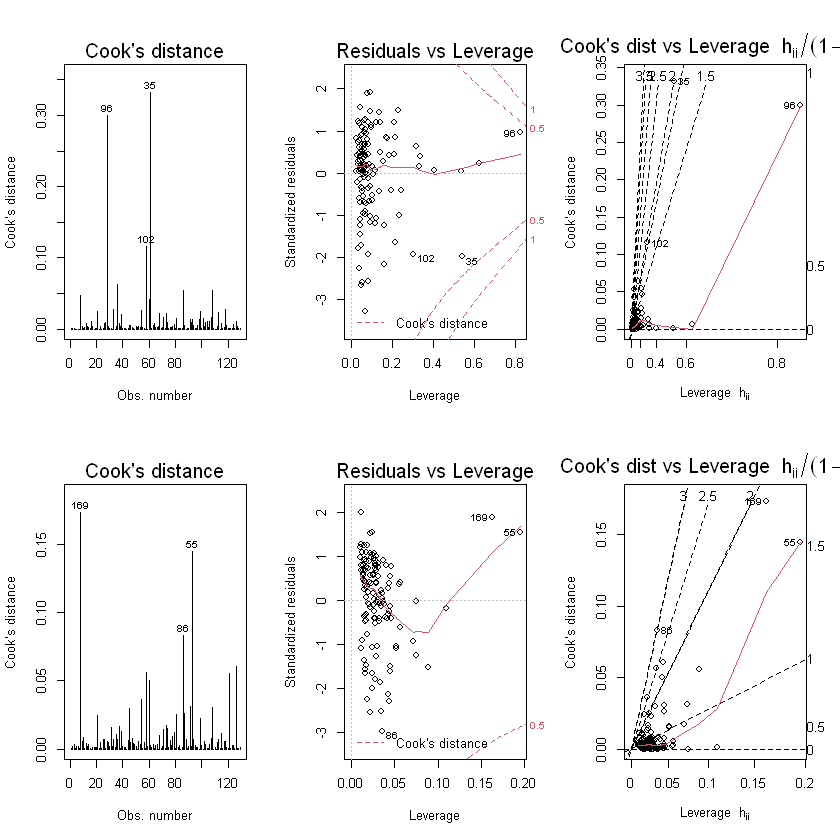

In [132]:
par(mfrow = c(2,2))
# residual analysis
plot(cfm.fit4, which = 1:2, main = "AIC Model")
plot(cfm.fit3, which = 1:2, main = "BIC Model")
par(mfrow = c(2,3))
# outlying cases
plot(cfm.fit4, which = 4:6)
plot(cfm.fit3, which = 4:6)
# calculate cook's distance and determine outliers
cooks = getCooksDist(cfm.fit4)
cfmOutliers = cbind(cfmDf.train[which(cooks > 4/(cfm.fit4$df.residual)),c(1,43)], CooksDist = cooks[which(cooks > 4/(cfm.fit4$df.residual))])
cfmOutliers[order(cfmOutliers$CooksDist, decreasing = TRUE),]

In [152]:
# examine influence of possible outlier
cfm.fit4.rmOutlier = lm(formula = cfm.fit4$call$formula, data = cfmDf.train[-c(35,96),])
per.change = abs((cfm.fit4$fitted.values - predict.lm(cfm.fit4.rmOutlier, cfmDf.train))/cfm.fit4$fitted.values)*100
summary(per.change)

# remove outliers
cfmDf.train.rmOutlier = cfmDf.train[-c(35,96),]

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00244  0.53024  1.27306  4.20605  3.23881 87.56883 

### Death Cases
Notes: <br>
* Residual vs fitted plot shows pattern, but qq-plot shows residuals are distributed closed to linear.
* Percent changes between fitted values with vs without possible outliers is between 0.005% to about 4000%. The outliers have to be removed.

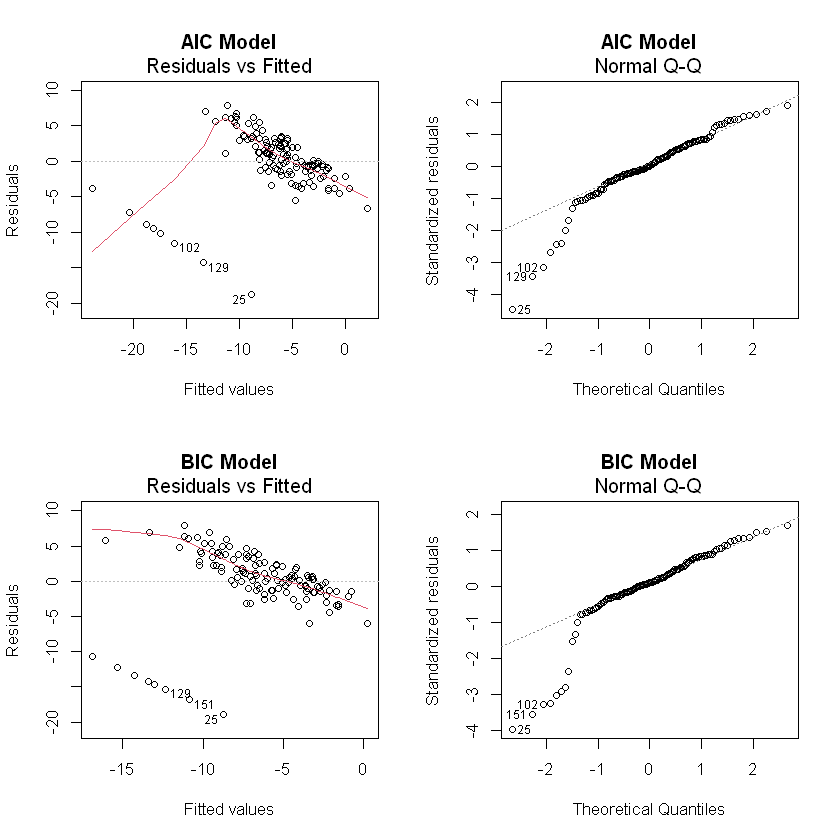

,Country,Deaths,CooksDist
,<chr>,<dbl>,<dbl>
102,Mongolia,-27.631021,0.27085318
92,Luxembourg,-3.558518,0.19492507
60,Grenada,-27.631021,0.15496021
42,Dominica,-27.631021,0.13860239
151,Timor-Leste,-27.631021,0.11493042
130,Saint Lucia,-27.631021,0.06873268
129,Saint Kitts and Nevis,-27.631021,0.06360134
25,Cambodia,-27.631021,0.05615290
86,Lao People's Democratic Republic,-27.631021,0.04856424


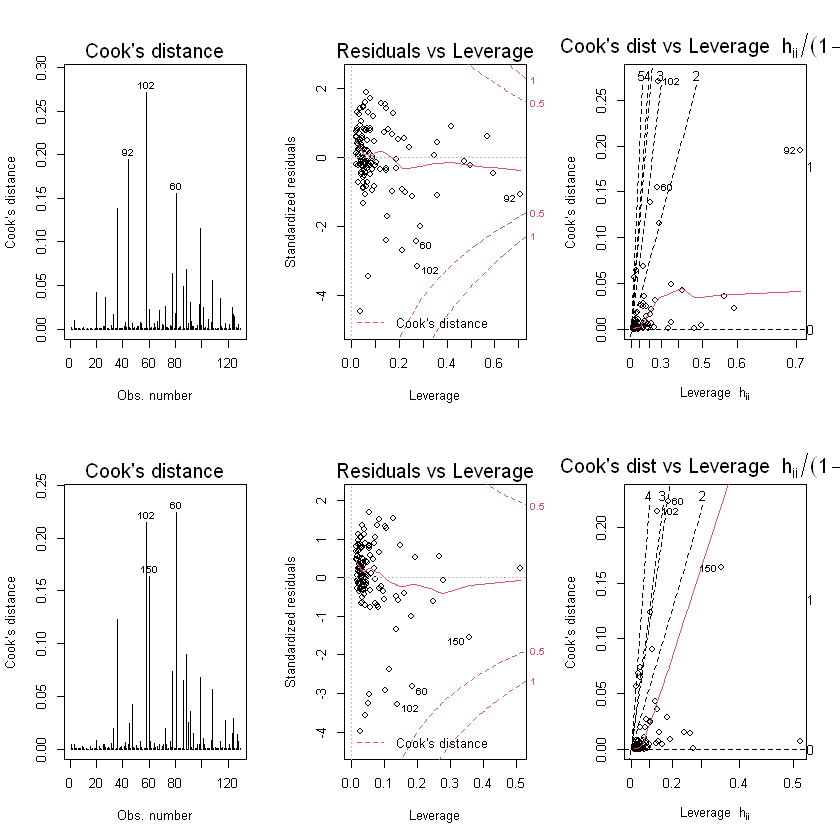

In [133]:
par(mfrow = c(2,2))
# residual analysis
plot(death.fit4, which = 1:2, main = "AIC Model")
plot(death.fit3, which = 1:2, main = "BIC Model")
par(mfrow = c(2,3))
# outlying cases
plot(death.fit4, which = 4:6)
plot(death.fit3, which = 4:6)
# calculate cook's distance and determine outliers
cooks = getCooksDist(death.fit4)
deathOutliers = cbind(deathDf.train[which(cooks > 4/(death.fit4$df.residual)),c(1,43)], CooksDist = cooks[which(cooks > 4/(death.fit4$df.residual))])
deathOutliers[order(deathOutliers$CooksDist, decreasing = TRUE),]

In [153]:
# examine influence of possible outlier
death.fit4.rmOutlier = lm(formula = death.fit4$call$formula, data = deathDf.train[-c(102,92),])
per.change = abs((death.fit4$fitted.values - predict.lm(death.fit4.rmOutlier, deathDf.train))/death.fit4$fitted.values)*100
summary(per.change)

# remove outlier
deathDf.train.rmOutlier = deathDf.train[-c(102,92),]

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.005    0.330    0.882   33.199    2.527 3977.758 

### Recovery Cases
Notes: <br>
* Residuals vs fitted plot does not show any non-constance of variance. qqplot also shows normality.
* percent change between fitted values with vs without possible outliers is between 0.25% to about 100,000%. Outliers have to be removed.

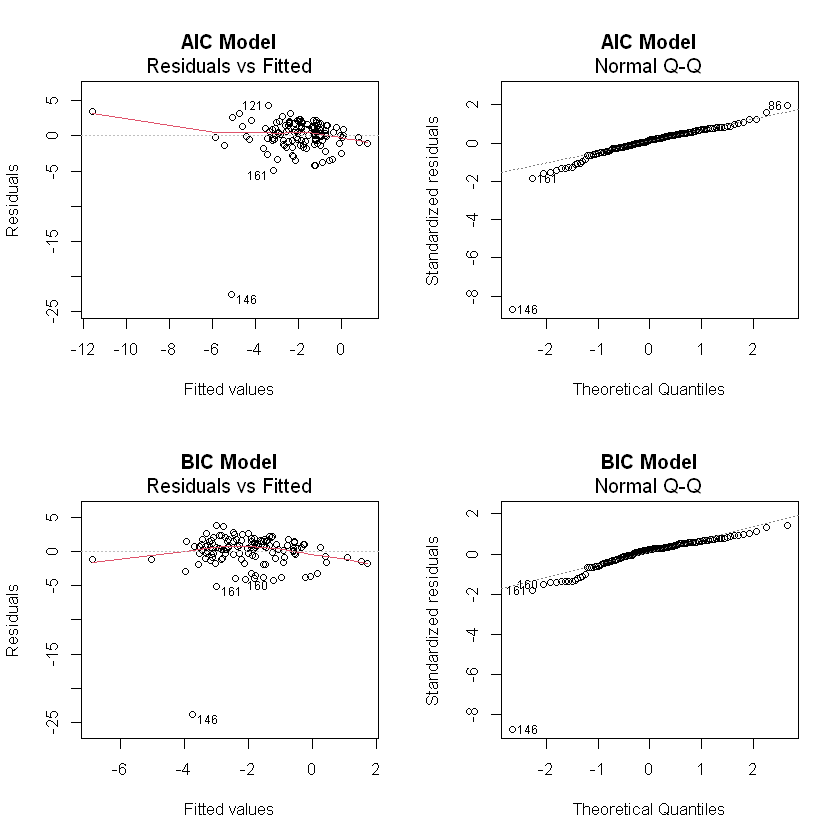

,Country,Rec,CooksDist
,<chr>,<dbl>,<dbl>
146,Sweden,-27.631021,0.86626760
86,Lao People's Democratic Republic,-8.054744,0.58781126
55,Gambia,-1.922965,0.03578883


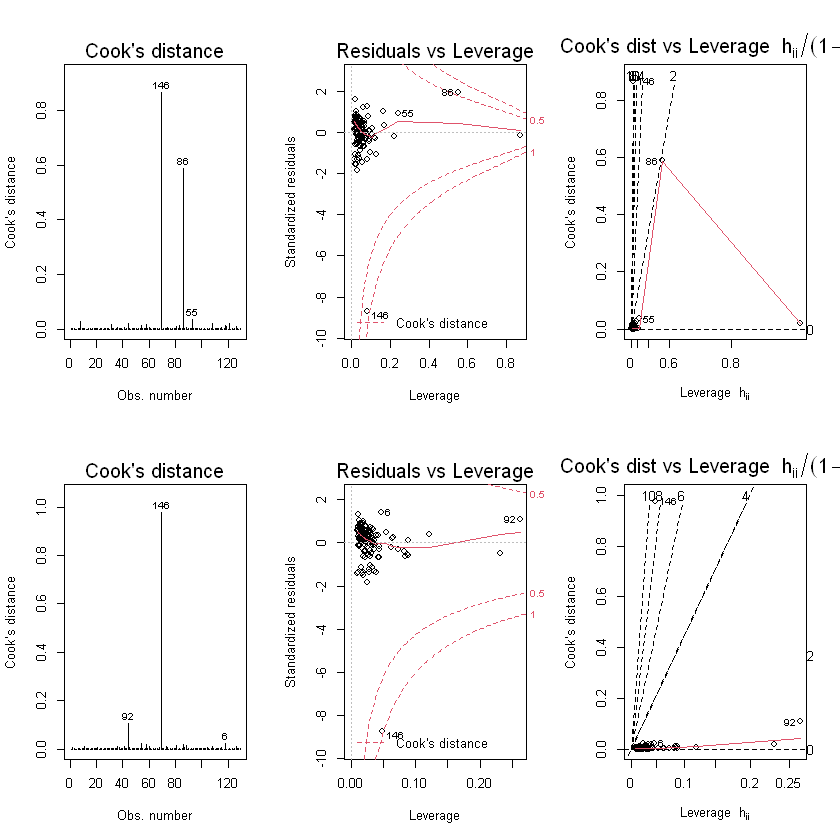

In [135]:
par(mfrow = c(2,2))
# residual analysis
plot(rec.fit2, which = 1:2, main = "AIC Model")
plot(rec.fit3, which = 1:2, main = "BIC Model")
par(mfrow = c(2,3))
# outlying cases
plot(rec.fit2, which = 4:6)
plot(rec.fit3, which = 4:6)
# calculate cook's distance and determine outliers
cooks = getCooksDist(rec.fit2)
recOutliers = cbind(recDf.train[which(cooks > 4/(rec.fit2$df.residual)),c(1,43)], CooksDist = cooks[which(cooks > 4/(rec.fit2$df.residual))])
recOutliers[order(recOutliers$CooksDist, decreasing = TRUE),]

In [149]:
# examine influence of possible outlier
rec.fit2.rmOutlier = lm(formula = rec.fit2$call$formula, data = recDf.train[-c(146,86),])
per.change = abs((rec.fit2$fitted.values - predict.lm(rec.fit2.rmOutlier, recDf.train))/rec.fit2$fitted.values)*100
summary(per.change)

# remove outliers from dataset
recDf.train.rmOutlier = recDf.train[-c(146,86),]

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.25     4.23     8.37   759.89    18.55 95059.56 

### Active Cases
Notes: <br>
* residuals vs fitted plot does not show severe non constant variance. qqplot also shows normality is followed.
* percent changes between fitted values with vs without possible outlier is close to 0%. No large influence on prediction and thus may be retained.

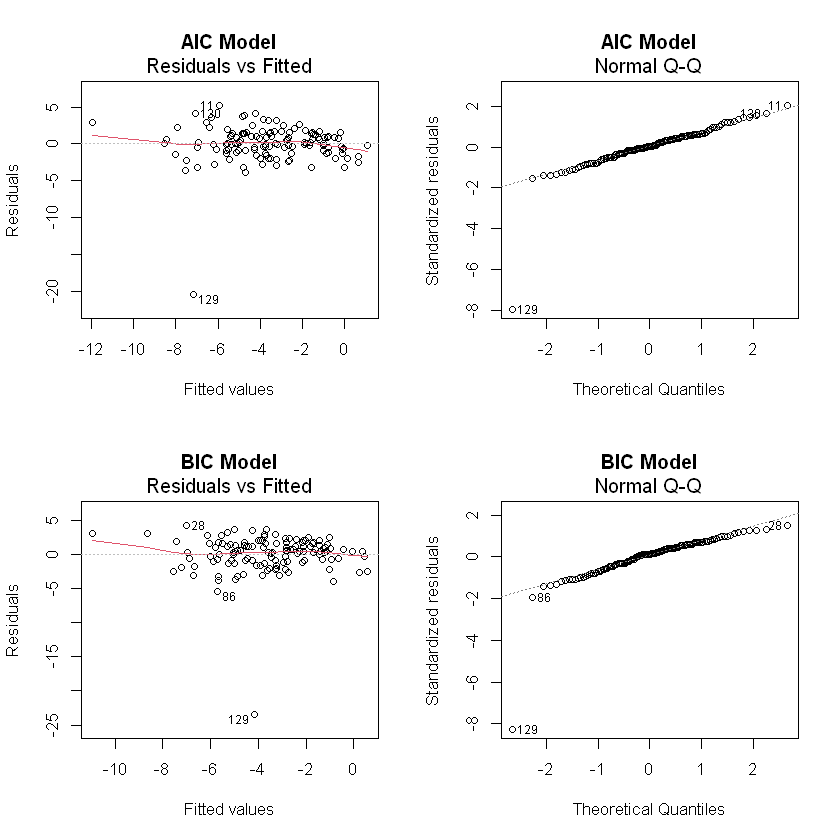

,Country,Active,CooksDist
,<chr>,<dbl>,<dbl>
129,Saint Kitts and Nevis,-27.6310211,0.50899993
118,Pakistan,-4.7570378,0.05876865
31,China,-10.1373019,0.04910334
167,Vietnam,-9.0947320,0.04069953
130,Saint Lucia,-2.9114719,0.03477103
11,Bahamas,-0.7518335,0.03455829


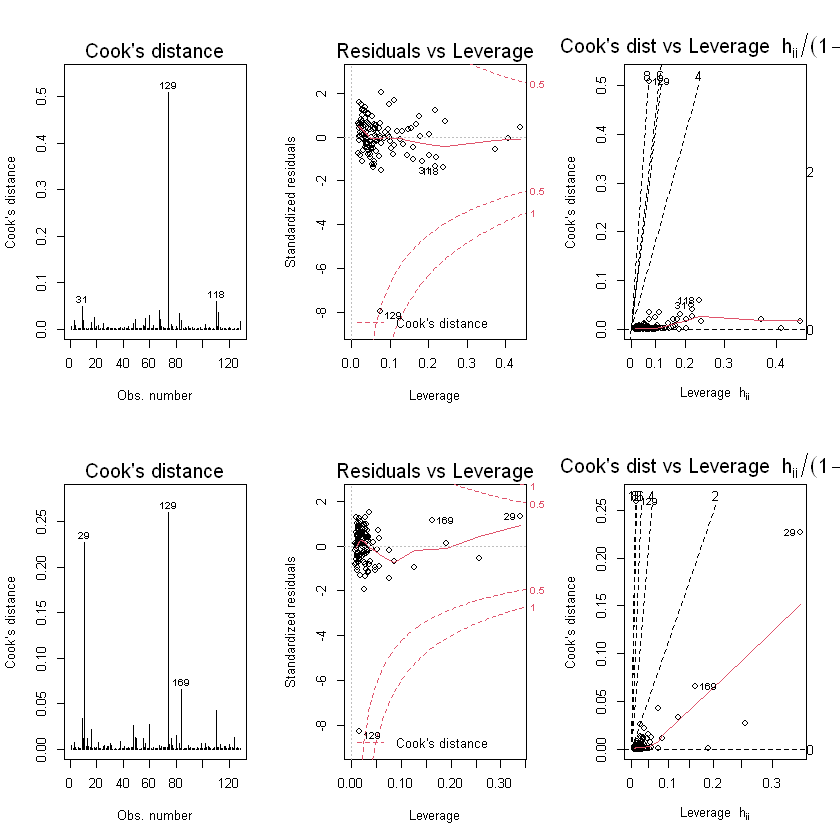

In [136]:
par(mfrow = c(2,2))
# residual analysis
plot(act.fit4, which = 1:2, main = "AIC Model")
plot(act.fit3, which = 1:2, main = "BIC Model")
par(mfrow = c(2,3))
# outlying cases
plot(act.fit4, which = 4:6)
plot(act.fit3, which = 4:6)
# calculate cook's distance and determine outliers
cooks = getCooksDist(act.fit4)
actOutliers = cbind(actDf.train[which(cooks > 4/(act.fit4$df.residual)),c(1,43)], CooksDist = cooks[which(cooks > 4/(act.fit4$df.residual))])
actOutliers[order(actOutliers$CooksDist, decreasing = TRUE),]

In [151]:
# examine influence of possible outlier
act.fit4.rmOutlier = lm(formula = act.fit4$call$formula, data = actDf.train[-129,])
per.change = abs((act.fit4$fitted.values - predict.lm(act.fit4.rmOutlier, actDf.train))/act.fit4$fitted.values)*100
summary(per.change)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 1.779e-14 3.395e-14 4.837e-13 1.017e-13 4.612e-11 

## Refit Models without outliers with AIC criterion

### Confirmed Cases

In [154]:
cfm.fit5 = lm(Cfm ~ 1, data = cfmDf.train.rmOutlier[,-1])

# fitting AIC model
cfm.fit6 = stepAIC(cfm.fit5, 
                   scope = list(upper = lm(Cfm ~ ., data = cfmDf.train.rmOutlier[,-1]),
                               lower = cfm.fit5),
                   direction = "both", trace = 0, k = 2)

In [155]:
summary(cfm.fit6)


Call:
lm(formula = Cfm ~ `Offals-protein` + `Sweeteners-kcal` + `Sweeteners-protein` + 
    `Meat-kcal` + `Treenuts-protein` + `Seafood-kcal` + `Stim-fat` + 
    `Alc-food` + `Pulses-protein` + `Fruits-protein` + `Eggs-kcal`, 
    data = cfmDf.train.rmOutlier[, -1])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2605 -0.6574  0.1171  1.0547  2.6834 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           5.07177    2.07496   2.444 0.016033 *  
`Offals-protein`     -0.35794    0.10389  -3.445 0.000797 ***
`Sweeteners-kcal`     0.14507    0.07764   1.868 0.064251 .  
`Sweeteners-protein`  0.88086    0.44568   1.976 0.050500 .  
`Meat-kcal`          -0.62192    0.11217  -5.545  1.9e-07 ***
`Treenuts-protein`   -0.17881    0.04517  -3.959 0.000131 ***
`Seafood-kcal`       -0.80169    0.28675  -2.796 0.006070 ** 
`Stim-fat`            0.37560    0.20482   1.834 0.069277 .  
`Alc-food`            0.13373    0.06006   2.227 0.027913 *  
`Pu

In [156]:
cfm.fit7 = stepAIC(cfm.fit5,
                  scope = list(upper = lm(Cfm ~ (`Offals-protein` + `Sweeteners-kcal` + `Sweeteners-protein` + 
                                            `Meat-kcal` + `Treenuts-protein` + `Seafood-kcal` + `Stim-fat` + 
                                            `Alc-food` + `Pulses-protein` + `Fruits-protein` + `Eggs-kcal`)^2, 
                                        data = cfmDf.train.rmOutlier[, -1]),
                              lower= cfm.fit5),
                  direction = "both", trace = 0, k = 2)
summary(cfm.fit7)


Call:
lm(formula = Cfm ~ `Offals-protein` + `Treenuts-protein` + `Meat-kcal` + 
    `Seafood-kcal` + `Sweeteners-protein` + `Fruits-protein` + 
    `Eggs-kcal` + `Stim-fat` + `Alc-food` + `Offals-protein`:`Meat-kcal` + 
    `Treenuts-protein`:`Meat-kcal` + `Treenuts-protein`:`Seafood-kcal` + 
    `Seafood-kcal`:`Eggs-kcal` + `Meat-kcal`:`Seafood-kcal` + 
    `Sweeteners-protein`:`Alc-food` + `Meat-kcal`:`Alc-food` + 
    `Meat-kcal`:`Sweeteners-protein` + `Offals-protein`:`Stim-fat`, 
    data = cfmDf.train.rmOutlier[, -1])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8920 -0.5676  0.1387  0.8330  2.8692 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        3.61856    2.30171   1.572 0.118848    
`Offals-protein`                   0.18555    0.16743   1.108 0.270232    
`Treenuts-protein`                -0.16071    0.05527  -2.908 0.004421 ** 
`Meat-kcal`                       -1.11972    0.29165  -3.83

### Death Cases

In [157]:
death.fit5 = lm(Deaths ~ 1, data = deathDf.train.rmOutlier[,-1])

# fitting AIC model
death.fit6 = stepAIC(death.fit5, 
                   scope = list(upper = lm(Deaths ~ ., data = deathDf.train.rmOutlier[,-1]),
                               lower = death.fit5),
                   direction = "both", trace = 0, k = 2)

In [158]:
summary(death.fit6)


Call:
lm(formula = Deaths ~ `Misc-protein` + `Meat-kcal` + `Eggs-kcal` + 
    `Spices-kcal` + `Pulses-protein` + `Treenuts-kcal` + `Stim-food` + 
    `Stim-protein`, data = deathDf.train.rmOutlier[, -1])

Residuals:
     Min       1Q   Median       3Q      Max 
-18.5259  -1.3937   0.2935   2.9097   7.7428 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -6.3212     1.1292  -5.598 1.44e-07 ***
`Misc-protein`     0.3801     0.1314   2.893  0.00455 ** 
`Meat-kcal`       -1.0843     0.2498  -4.340 3.02e-05 ***
`Eggs-kcal`        6.9815     1.8312   3.813  0.00022 ***
`Spices-kcal`    -24.6701     7.7741  -3.173  0.00192 ** 
`Pulses-protein`  14.3907     5.5109   2.611  0.01019 *  
`Treenuts-kcal`    3.3085     1.6576   1.996  0.04824 *  
`Stim-food`       -4.2152     2.3853  -1.767  0.07979 .  
`Stim-protein`   -43.3932    31.1149  -1.395  0.16575    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.8

In [159]:
death.fit7 = stepAIC(death.fit5,
                  scope = list(upper = lm(Deaths ~ (`Misc-protein` + `Meat-kcal` + `Eggs-kcal` + 
                                            `Spices-kcal` + `Pulses-protein` + `Treenuts-kcal` + `Stim-food` + 
                                            `Stim-protein`)^2, 
                                        data = deathDf.train.rmOutlier[, -1]),
                              lower= death.fit5),
                  direction = "both", trace = 0, k = 2)
summary(death.fit7)


Call:
lm(formula = Deaths ~ `Misc-protein` + `Meat-kcal` + `Eggs-kcal` + 
    `Spices-kcal` + `Pulses-protein` + `Treenuts-kcal` + `Stim-food` + 
    `Misc-protein`:`Pulses-protein` + `Meat-kcal`:`Stim-food` + 
    `Misc-protein`:`Spices-kcal` + `Treenuts-kcal`:`Stim-food` + 
    `Misc-protein`:`Meat-kcal` + `Eggs-kcal`:`Spices-kcal`, data = deathDf.train.rmOutlier[, 
    -1])

Residuals:
     Min       1Q   Median       3Q      Max 
-18.7787  -1.4752   0.0873   2.5958   7.8635 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -4.29949    1.54479  -2.783 0.006311 ** 
`Misc-protein`                    0.65820    0.31614   2.082 0.039599 *  
`Meat-kcal`                      -1.27826    0.38858  -3.290 0.001338 ** 
`Eggs-kcal`                       8.48863    2.29515   3.699 0.000336 ***
`Spices-kcal`                    -4.69534   14.38179  -0.326 0.744666    
`Pulses-protein`                 -0.10761    9.21151  -0

### Recovered Cases

In [161]:
rec.fit5 = lm(Rec ~ 1, data = recDf.train.rmOutlier[,-1])

# fitting AIC model
rec.fit6 = stepAIC(rec.fit5, 
                   scope = list(upper = lm(Rec ~ ., data = recDf.train.rmOutlier[,-1]),
                               lower = rec.fit5),
                   direction = "both", trace = 0, k = 2)

In [162]:
summary(rec.fit6)


Call:
lm(formula = Rec ~ `Stim-fat` + `Sweeteners-kcal` + `StRt-protein` + 
    `Offals-protein` + `VegProd-food`, data = recDf.train.rmOutlier[, 
    -1])

Residuals:
     Min       1Q   Median       3Q      Max 
-23.7163  -0.8291   0.4849   1.4164   4.0528 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -3.3139     0.9009  -3.679 0.000350 ***
`Stim-fat`          1.5383     0.4305   3.573 0.000506 ***
`Sweeteners-kcal`   0.1989     0.1253   1.588 0.114971    
`StRt-protein`     -2.0305     0.8507  -2.387 0.018535 *  
`Offals-protein`   -0.3423     0.1797  -1.905 0.059198 .  
`VegProd-food`      0.8699     0.5941   1.464 0.145691    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.776 on 122 degrees of freedom
Multiple R-squared:  0.1825,	Adjusted R-squared:  0.149 
F-statistic: 5.446 on 5 and 122 DF,  p-value: 0.0001472


In [163]:
rec.fit7 = stepAIC(rec.fit5,
                  scope = list(upper = lm(Rec ~ (`Stim-fat` + `Sweeteners-kcal` + `StRt-protein` + 
                                                `Offals-protein` + `VegProd-food`)^2, 
                                        data = recDf.train.rmOutlier[, -1]),
                              lower= rec.fit5),
                  direction = "both", trace = 0, k = 2)
summary(rec.fit7)


Call:
lm(formula = Rec ~ `Stim-fat` + `Sweeteners-kcal` + `StRt-protein` + 
    `Offals-protein` + `VegProd-food` + `Stim-fat`:`StRt-protein` + 
    `StRt-protein`:`VegProd-food` + `Stim-fat`:`VegProd-food`, 
    data = recDf.train.rmOutlier[, -1])

Residuals:
    Min      1Q  Median      3Q     Max 
-20.529  -1.010   0.373   1.357   5.171 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.6374     1.1735  -0.543  0.58805    
`Stim-fat`                      1.8542     0.9147   2.027  0.04489 *  
`Sweeteners-kcal`               0.2289     0.1230   1.861  0.06527 .  
`StRt-protein`                -10.2629     2.3722  -4.326 3.17e-05 ***
`Offals-protein`               -0.4682     0.1759  -2.662  0.00885 ** 
`VegProd-food`                 -1.6139     1.0638  -1.517  0.13190    
`Stim-fat`:`StRt-protein`       1.5297     0.5928   2.580  0.01108 *  
`StRt-protein`:`VegProd-food`   8.3452     2.5060   3.330  0.00116 ** 
`S

### Diagnostics
Notes: <br>
* Since Confirmed, Death, Recovery, Active rate are not independent, cannot fully trust the values of all the models here. Also, since Recovery model is not very good, we will not use it too. We will dive deeper into Confirmed cases and Deaths.
* The diet has very high correlation with number of confirm cases (more than 0.6). This model has very high predictive ability (MSPE and Pressp) and little bias too (high number of variables). We can also consider the variability of this model is small compared to the other 3 models (smaller MSE compared to the rest).

In [164]:
# training model
cfm.fit7.diag = modelDiag(cfm.fit7, sum(cfm.fit7$residuals^2)/cfm.fit7$df.residual)
death.fit7.diag = modelDiag(death.fit7, sum(death.fit7$residuals^2)/death.fit7$df.residual)
rec.fit7.diag = modelDiag(rec.fit7, sum(rec.fit7$residuals^2)/rec.fit7$df.residual)

train.diagComp = data.frame(Cfm = cfm.fit7.diag, Death = death.fit7.diag, Rec = rec.fit7.diag, Active = act.fit4.diag)
train.diagComp

,Cfm,Death,Rec,Active
,<dbl>,<dbl>,<dbl>,<dbl>
p,19.0000000,14.0000000,9.0000000,10.0000000
SSE,187.1160713,2112.1809297,842.2036144,839.6156965
MSE,1.7325562,18.6918666,7.0773413,7.1153873
R2,0.6653222,0.4947776,0.2678486,0.4491992
Adj.R2,0.6095426,0.4366547,0.2186283,0.4071889
Cp,19.0000000,14.0000000,9.0000000,10.5329552
PRESSp,277.9178608,2885.4795471,1124.1528947,992.4198818


In [167]:
# validation models
cfm.fit7.v = lm(cfm.fit7$call$formula, data = cfmDf.valid[,-1])
death.fit7.v = lm(death.fit7$call$formula, data = deathDf.valid[,-1])
rec.fit7.v = lm(rec.fit7$call$formula, data = recDf.valid[,-1])
act.fit4.v = lm(act.fit4$call$formula, data = actDf.valid[,-1])

valid.diagComp = data.frame(Cfm = c(getMspe(cfm.fit7.v), `SSE/n` = sum(cfm.fit7$residuals^2)/nrow(cfmDf.train)), 
                            Death = c(getMspe(death.fit7.v), `SSE/n` = sum(death.fit7$residuals^2)/nrow(deathDf.train)), 
                            Rec = c(getMspe(rec.fit7.v), `SSE/n` = sum(rec.fit7$residuals^2)/nrow(recDf.train)), 
                            Active = c(getMspe(act.fit4.v), `SSE/n` = sum(act.fit4$residuals^2)/nrow(actDf.train)))
valid.diagComp

,Cfm,Death,Rec,Active
,<dbl>,<dbl>,<dbl>,<dbl>
MSPE,0.4518208,13.78182,16.70231,2.723729
SSE/n,1.4505122,16.37350,6.52871,6.559498


# Combine train and validation data, and build final model

In [169]:
cfmDf.rmOutlier = rbind(cfmDf.train.rmOutlier, cfmDf.valid)

cfm.fit.final = lm(cfm.fit7$call$formula, data = cfmDf.rmOutlier)
summary(cfm.fit.final)
anova(cfm.fit.final)


Call:
lm(formula = cfm.fit7$call$formula, data = cfmDf.rmOutlier)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9542 -0.7262  0.1341  0.8625  2.7878 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        4.534934   2.011207   2.255 0.025685 *  
`Offals-protein`                   0.151973   0.159567   0.952 0.342520    
`Treenuts-protein`                -0.169904   0.047830  -3.552 0.000520 ***
`Meat-kcal`                       -1.039900   0.278622  -3.732 0.000274 ***
`Seafood-kcal`                     5.305586   2.008929   2.641 0.009199 ** 
`Sweeteners-protein`               0.769220   0.808096   0.952 0.342781    
`Fruits-protein`                   0.280432   0.166655   1.683 0.094646 .  
`Eggs-kcal`                        2.287167   0.797270   2.869 0.004755 ** 
`Stim-fat`                         0.019128   0.219674   0.087 0.930737    
`Alc-food`                        -0.036710   0.098036  -0.374 0

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
`Offals-protein`,1,171.848183,171.848183,101.672657,2.439669e-18
`Treenuts-protein`,1,59.429979,59.429979,35.161290,2.230013e-08
`Meat-kcal`,1,52.197022,52.197022,30.881967,1.326227e-07
`Seafood-kcal`,1,41.021049,41.021049,24.269788,2.313550e-06
`Sweeteners-protein`,1,8.401752,8.401752,4.970832,2.735960e-02
`Fruits-protein`,1,1.843608,1.843608,1.090756,2.980909e-01
`Eggs-kcal`,1,7.875988,7.875988,4.659768,3.256998e-02
`Stim-fat`,1,5.451667,5.451667,3.225437,7.464377e-02
`Alc-food`,1,6.714016,6.714016,3.972296,4.818459e-02


In [170]:
deathDf.rmOutlier = rbind(deathDf.train.rmOutlier, deathDf.valid)

death.fit.final = lm(death.fit7$call$formula, data = deathDf.rmOutlier)
summary(death.fit.final)
anova(death.fit.final)


Call:
lm(formula = death.fit7$call$formula, data = deathDf.rmOutlier)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.0093  -1.5300   0.2467   2.2613   9.3428 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -5.52226    1.42868  -3.865 0.000166 ***
`Misc-protein`                    0.60634    0.28837   2.103 0.037214 *  
`Meat-kcal`                      -0.97641    0.36626  -2.666 0.008543 ** 
`Eggs-kcal`                       7.90090    1.98203   3.986 0.000106 ***
`Spices-kcal`                    -8.33838   13.22785  -0.630 0.529441    
`Pulses-protein`                  2.65219    8.77115   0.302 0.762796    
`Treenuts-kcal`                  -1.45653    2.59714  -0.561 0.575780    
`Stim-food`                     -24.66744    4.94370  -4.990 1.70e-06 ***
`Misc-protein`:`Pulses-protein`   5.25861    1.94427   2.705 0.007650 ** 
`Meat-kcal`:`Stim-food`           3.96000    0.94406   4.195 4.72e-05 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
`Misc-protein`,1,408.21711,408.21711,20.893260,1.026657e-05
`Meat-kcal`,1,271.18667,271.18667,13.879804,2.778503e-04
`Eggs-kcal`,1,397.20143,397.20143,20.329458,1.328759e-05
`Spices-kcal`,1,149.16552,149.16552,7.634550,6.463549e-03
`Pulses-protein`,1,263.79966,263.79966,13.501725,3.339626e-04
`Treenuts-kcal`,1,97.01700,97.01700,4.965498,2.738648e-02
`Stim-food`,1,64.33786,64.33786,3.292923,7.163183e-02
`Misc-protein`:`Pulses-protein`,1,181.69514,181.69514,9.299472,2.722570e-03
`Meat-kcal`:`Stim-food`,1,232.79249,232.79249,11.914723,7.286972e-04


In [171]:
recDf.rmOutlier = rbind(recDf.train.rmOutlier, recDf.valid)

rec.fit.final = lm(rec.fit7$call$formula, data = recDf.rmOutlier)
summary(rec.fit.final)
anova(rec.fit.final)


Call:
lm(formula = rec.fit7$call$formula, data = recDf.rmOutlier)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.6290  -0.8693   0.6076   1.4221   5.3340 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.7008     1.3236  -0.529 0.597268    
`Stim-fat`                      1.0711     1.0231   1.047 0.296814    
`Sweeteners-kcal`               0.2026     0.1329   1.524 0.129559    
`StRt-protein`                -10.0419     2.7404  -3.664 0.000342 ***
`Offals-protein`               -0.5287     0.2030  -2.604 0.010118 *  
`VegProd-food`                 -1.2145     1.0989  -1.105 0.270810    
`Stim-fat`:`StRt-protein`       1.8075     0.7005   2.580 0.010821 *  
`StRt-protein`:`VegProd-food`   8.6106     2.6160   3.292 0.001239 ** 
`Stim-fat`:`VegProd-food`      -1.7530     1.2640  -1.387 0.167517    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.253 on 15

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
`Stim-fat`,1,41.007108,41.007108,3.8756746,0.050809369
`Sweeteners-kcal`,1,52.099382,52.099382,4.9240305,0.027967278
`StRt-protein`,1,5.038626,5.038626,0.4762119,0.491195490
`Offals-protein`,1,30.920006,30.920006,2.9223197,0.089402905
`VegProd-food`,1,35.197686,35.197686,3.3266130,0.070131252
`Stim-fat`:`StRt-protein`,1,21.299891,21.299891,2.0131009,0.157993537
`StRt-protein`:`VegProd-food`,1,94.319668,94.319668,8.9143654,0.003298663
`Stim-fat`:`VegProd-food`,1,20.350360,20.350360,1.9233586,0.167517347
Residuals,152,1608.256891,10.580637,NA,NA


In [173]:
actDf.rmOutlier = rbind(actDf.train, actDf.valid)

act.fit.final = lm(act.fit4$call$formula, data = actDf.rmOutlier)
summary(act.fit.final)
anova(act.fit.final)


Call:
lm(formula = act.fit4$call$formula, data = actDf.rmOutlier)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.1978  -1.2324   0.2882   1.4351   5.0358 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -3.94955    1.01599  -3.887 0.000152 ***
`Misc-protein`                0.18029    0.14099   1.279 0.202974    
`Offals-protein`             -0.45425    0.16637  -2.730 0.007083 ** 
`Meat-kcal`                  -0.90912    0.24407  -3.725 0.000276 ***
`Eggs-kcal`                   2.74895    0.85172   3.228 0.001534 ** 
`Spices-protein`             -0.34072    0.19307  -1.765 0.079637 .  
`Stim-fat`                    1.31085    0.84350   1.554 0.122275    
`Meat-kcal`:`Spices-protein`  0.21584    0.06919   3.119 0.002173 ** 
`Misc-protein`:`Stim-fat`    -0.09614    0.08671  -1.109 0.269319    
`Misc-protein`:`Meat-kcal`    0.04968    0.03023   1.643 0.102407    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
`Misc-protein`,1,531.753719,531.753719,79.766516,1.406126e-15
`Offals-protein`,1,66.295279,66.295279,9.944723,1.948875e-03
`Meat-kcal`,1,24.422411,24.422411,3.663520,5.752031e-02
`Eggs-kcal`,1,59.380647,59.380647,8.907483,3.316944e-03
`Spices-protein`,1,14.723535,14.723535,2.208626,1.393397e-01
`Stim-fat`,1,10.234924,10.234924,1.535305,2.172533e-01
`Meat-kcal`:`Spices-protein`,1,51.985555,51.985555,7.798171,5.911652e-03
`Misc-protein`:`Stim-fat`,1,2.435268,2.435268,0.365306,5.464872e-01
`Misc-protein`:`Meat-kcal`,1,18.003041,18.003041,2.700573,1.024067e-01
